# Figures present in the paper:

   - 1- Figures of Section 3
   - 2- Figures of Section 5
   - 3- Figures and tables of Section 4
   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


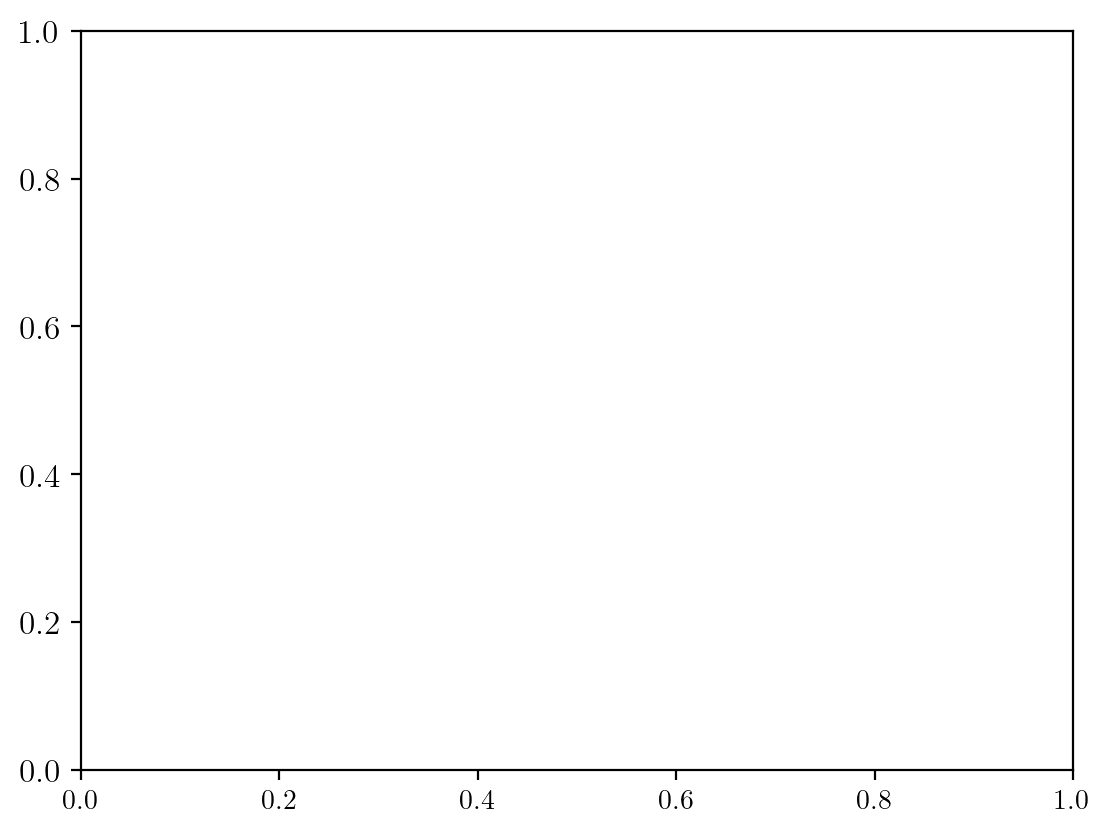

In [238]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import numpy as np
import time
import pickle

# make plots look nice
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 12
plt.rc('axes', labelsize=22)
plt.rc('legend', fontsize=12)
#formating ticks
plt.rcParams['axes.formatter.limits'] = (-1, 1)
plt.rcParams['axes.formatter.useoffset'] = False

# to delete this cell
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='retina'
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

# 1- Figures of Section 3: 

In [50]:
from mcrppy.spatial_windows import BoxWindow, BallWindow
from mcrppy.point_processes import HomogeneousPoissonPointProcess
from mcrppy.repelled_point_process import epsilon_critical, RepelledPointProcess
from mcrppy.coulomb_force import force_k
from mcrppy.monte_carlo_methods import _mc_result
from mcrppy.integrand_test_functions import (support_integrands,
                                             f_1, f_2, f_3)

## 1.1 Simulation Repelled sec 3.1

In [51]:
d = 2
intensity = 1000
poisson = HomogeneousPoissonPointProcess(intensity)
r=1
window = BallWindow(center=[0]*d, radius=r)
poisson_pp, repelled_poison_pp = poisson.generate_repelled_point_pattern(window, seed=120, nb_cores=4, output="simulation")

In [52]:
#finding the force on each point
points = poisson_pp.points
nb_points = points.shape[0]
force_x, force_y=[],[]
epsilon = epsilon_critical(d, intensity)
for k in range(0,nb_points):
    #force_ = epsilon*force_k(k=k, x=points[k], point_pattern=copy.deepcopy(poisson_pp))
    force = force_k(k=k, points=points, intensity=intensity)[0].tolist()
    force_x.append(force[0])
    force_y.append(force[1])


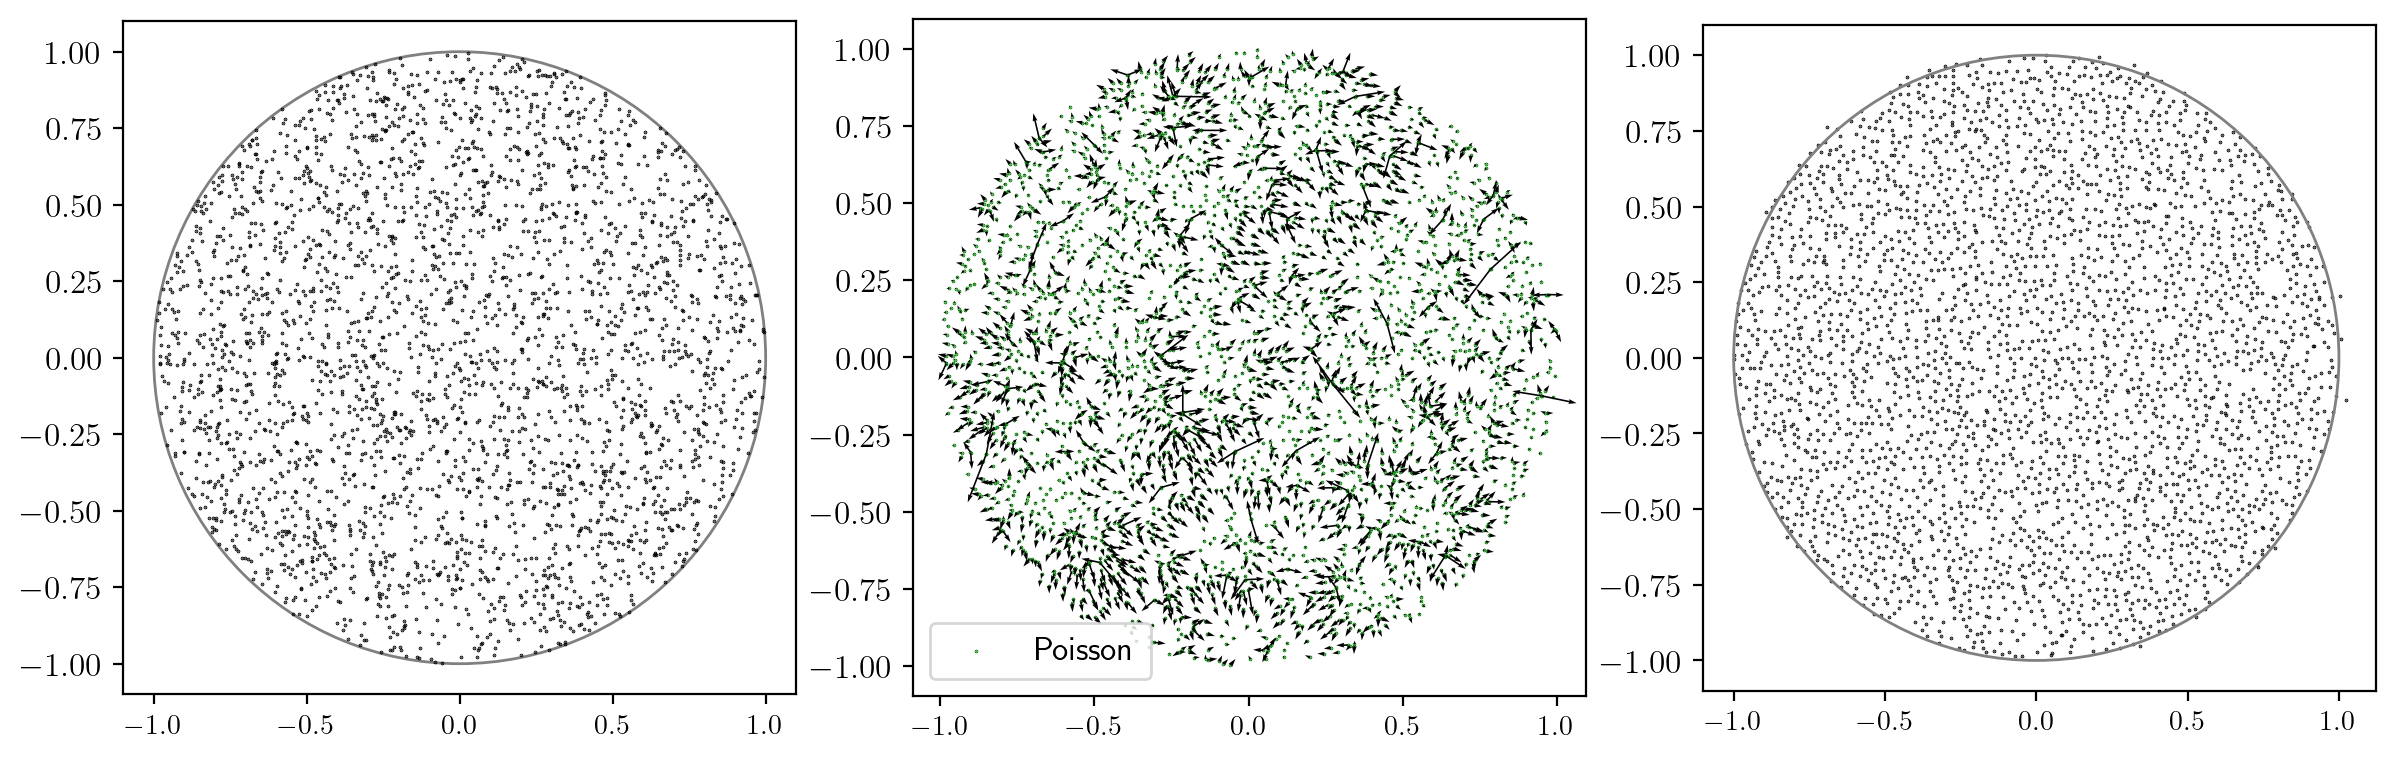

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
window.plot(axis=ax[0], color="grey")
poisson_pp.plot(axis=ax[0], s=0.1)
poisson_pp.plot(axis=ax[1], c="g", s=0.1, label="Poisson")
ax[1].quiver(points[:,0], points[:,1], force_x, force_y, units='xy')
repelled_poison_pp.plot(axis=ax[2], s=0.1)
window.plot(axis=ax[2], color="grey")
ax[1].legend()
#ax[0].set_title("Poisson")
#ax[2].set_title("Repelled Poisson")
plt.tight_layout()
plt.savefig("poisson_and_repelled_and_force.pdf")
plt.show()

## 1.2 Variance reduction 

In [150]:
d=3
nb_sample=50
nb_point_list=[500]
fct_list = [f_1, f_2, f_3]
fct_names = ["f_1", "f_2", "f_3"]

support_window = support_integrands(d) 
simulation_window = BallWindow(center=[0]*d,
                               radius=math.sqrt(d)) #simulation window
intensity = nb_point_list[0]/support_window.volume
print(intensity)

500.0


In [151]:
#Generate Poisson point process with fixed seeds

##set the seed for reproducibility
np.random.seed(122)
fixed_seed = np.random.poisson(lam=10, size=nb_sample).tolist()
poisson = HomogeneousPoissonPointProcess(intensity)
poisson_pp_big = [poisson.generate_point_pattern(window=simulation_window, seed=s) for s in fixed_seed]
poisson_pp = [p.restrict_to_window(support_window) for p in poisson_pp_big]


#Variance for poisson
mc_poisson = _mc_result(poisson_pp, "MC", 
                        fct_list=fct_list, 
                        fct_names=fct_names)

# variance for push
## f_1
std_f1_poisson = mc_poisson["mc_results_f_1"]["std_MC"]
## f_2
std_f2_poisson = mc_poisson["mc_results_f_2"]["std_MC"]
## f_3
std_f3_poisson = mc_poisson["mc_results_f_3"]["std_MC"]

# epsilons
epsilon_0 = epsilon_critical(d, intensity)
print("d=", d, "intensity", intensity, ",Nb samples=", nb_sample, " Nb simu points=", poisson_pp_big[0].points.shape[0], ",Epsilon critical=", epsilon_0)
epsilons = np.linspace(-3/2*epsilon_0, 2.5*epsilon_0, 25).tolist()
epsilons.append(epsilon_0)
epsilons.append(0)
epsilons.sort()
print(len(epsilons))

For MC
---------------
FOR f_1
std= [0.000740699561440178]
FOR f_2
std= [0.024932114814166618]
FOR f_3
std= [0.00047923120071267347]
d= 3 intensity 500.0 ,Nb samples= 50  Nb simu points= 10894 ,Epsilon critical= 7.957747154594768e-05
27


In [156]:
# # direct computation 
# # estimated time: 82 min
# stds_f1_repelled, stds_f2_repelled, stds_f3_repelled = [], [], []

# #repelled poisson 
# nb_cores = 4
# i=0
# mean_nb_points = []
# for epsilon in epsilons:
#     print("---------------")
#     print(i +1, "/ ", len(epsilons))
#     time_start = time.time() 
#     print("epsilon", epsilon)
#     if __name__ == "__main__":
#         rpp = [RepelledPointProcess(p) for p in poisson_pp_big]
#         #using F
#         repelled_pp_big = [g.repelled_point_pattern(epsilon=epsilon, nb_cores=nb_cores) for g in rpp]
#     repelled_pp = [g.restrict_to_window(support_window) for g in repelled_pp_big]
#     mc_push = _mc_result(repelled_pp, "MCRB", 
#                          fct_list=fct_list, 
#                          fct_names=fct_names)
#     mean_nb_points_repelled = np.mean([s.points.shape[0] for s in repelled_pp])
#     print("Mean N poisson=", np.mean([s.points.shape[0] for s in poisson_pp]),
#           "Mean N push=", mean_nb_points_repelled)
#     mean_nb_points.append(mean_nb_points_repelled)
    
#     # variance for push
#     ## f_1
#     stds_f1_repelled.append(mc_push["mc_results_f_1"]["std_MCRB"])
#     ## f_2
#     stds_f2_repelled.append(mc_push["mc_results_f_2"]["std_MCRB"])
#     ## f_3
#     stds_f3_repelled.append(mc_push["mc_results_f_3"]["std_MCRB"]) 
#     i+=1

# dic_std_poisson= {"std_f1_poisson": std_f1_poisson, 
#                   "std_f2_poisson": std_f2_poisson,
#                   "std_f3_poisson": std_f3_poisson,
#                   }
# dic_std_push = {"std_f1_repelled": stds_f1_repelled, 
#                   "std_f2_repelled": stds_f2_repelled,
#                   "std_f3_repelled": stds_f3_repelled,
#                   }
# dict_result_var_epsilon= {"std_poisson": dic_std_poisson,
#                           "std_repelled": dic_std_push}
# with open('mc_std_3d_wrt_epsilon.pickle', 'wb') as handle:
#     pickle.dump(dict_result_var_epsilon, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
# fig, axis = plt.subplots(figsize=(4,3))
# plt.plot(epsilons, mean_nb_points, 'b.')
# plt.plot(epsilons, mean_nb_points, 'b')

# plt.xlabel(r"$\varepsilon$")
# plt.ylabel(r"$\bar{N}$")
# plt.show()

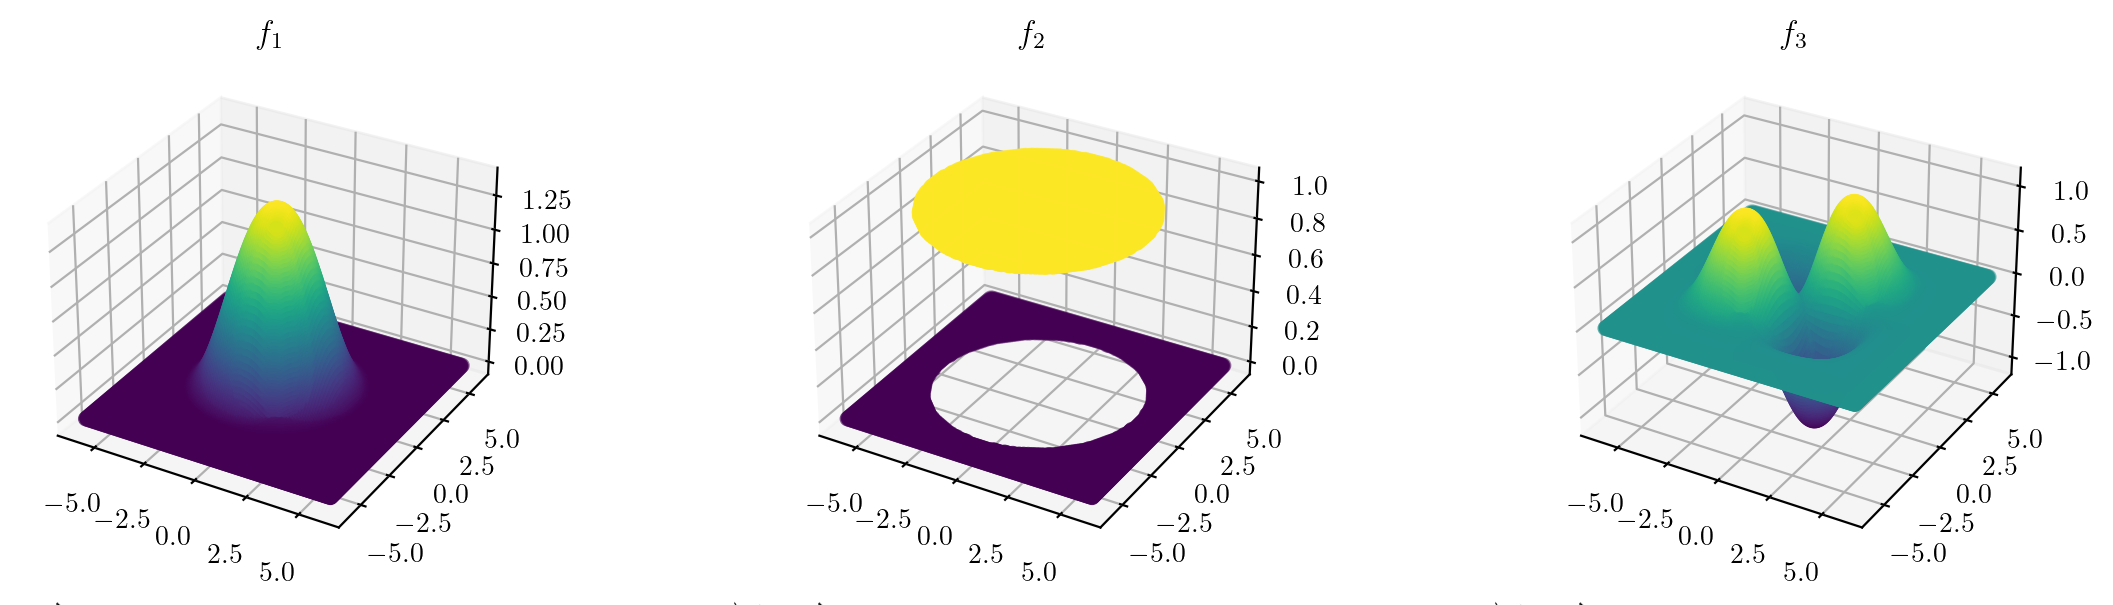

In [155]:
x = np.linspace(-3/5,3/5, 140)
X, Y = np.meshgrid(x, x)
points = np.array([X.ravel(), Y.ravel()]).T
z_f_1 = f_1(points)
z_f_2 = f_2(points)
z_f_3 = f_3(points)
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(X.ravel(), Y.ravel(), z_f_1, c=z_f_1, rasterized=True)
ax.set_title(r"$f_1$")
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(X.ravel(), Y.ravel(), z_f_2, c=z_f_2, rasterized=True)
ax.set_title(r"$f_2$")
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(X.ravel(), Y.ravel(), z_f_3, c=z_f_3, rasterized=True)
ax.set_title(r"$f_3$")
plt.tight_layout()
plt.savefig("linear_stat_used_for_var_comp.pdf")
plt.show()

In [158]:
# display saved results
with open('data/mc_std_3d_wrt_epsilon.pickle', 'rb') as file:
    dict_result_var_epsilon = pickle.load(file)

stds_f1_poisson = dict_result_var_epsilon["std_poisson"]["std_f1_poisson"]
stds_f2_poisson = dict_result_var_epsilon["std_poisson"]["std_f2_poisson"]
std_f3_poisson = dict_result_var_epsilon["std_poisson"]["std_f3_poisson"]

stds_f1_repelled = dict_result_var_epsilon["std_repelled"]["std_f1_repelled"]
stds_f2_repelled = dict_result_var_epsilon["std_repelled"]["std_f2_repelled"]
stds_f3_repelled = dict_result_var_epsilon["std_repelled"]["std_f3_repelled"]

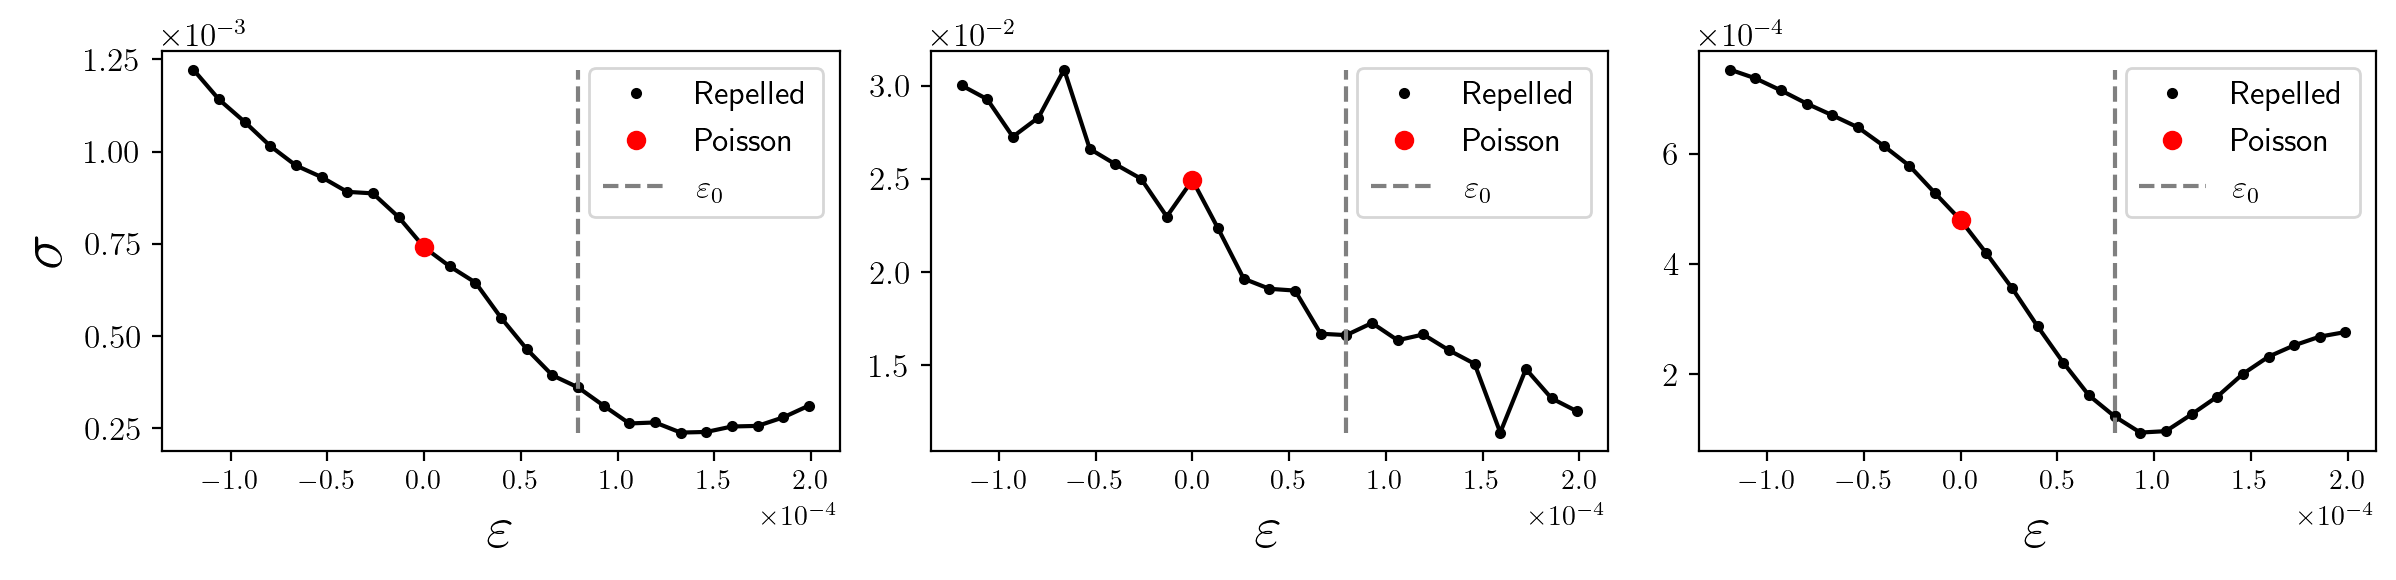

In [159]:
fig, ax = plt.subplots(1,3, figsize=(12, 3))
#f_1
ax[0].plot(epsilons, stds_f1_repelled, "k.", label=r"Repelled" )
ax[0].plot(epsilons, stds_f1_repelled, "k" )
ax[0].plot(0, std_f1_poisson, "ro", label="Poisson")
ax[0].vlines(epsilon_0, ymin=min(stds_f1_repelled), ymax=max(stds_f1_repelled), 
             colors="grey", linestyles='dashed', label=r"$\varepsilon_0$")
#ax[0].set_title(r"$f_1$")
ax[0].legend()
ax[0].set_xlabel(r"$\varepsilon$")
ax[0].set_ylabel(r"$\sigma$")
#f_2
ax[1].plot(epsilons, stds_f2_repelled,  "k.", label=r"Repelled")
ax[1].plot(epsilons, stds_f2_repelled,  "k")
ax[1].plot(0, std_f2_poisson, "ro", label="Poisson")
ax[1].vlines(epsilon_0, ymin=min(stds_f2_repelled), ymax=max(stds_f2_repelled), 
             colors="grey", linestyles='dashed', label=r"$\varepsilon_0$")
ax[1].legend()
#ax[1].set_title(r"$f_2$")
ax[1].set_xlabel(r"$\varepsilon$")
#ax[1].set_ylabel(r"$\sigma(\sum_{i=1}^{N} f(x_i)/N)$")
#f_3
ax[2].plot(epsilons, stds_f3_repelled,  "k.", label=r"Repelled")
ax[2].plot(epsilons, stds_f3_repelled,  "k")
ax[2].plot(0, std_f3_poisson, "ro", label="Poisson")
ax[2].vlines(epsilon_0, ymin=min(stds_f3_repelled), ymax=max(stds_f3_repelled), 
             colors="grey", linestyles='dashed', label=r"$\varepsilon_0$")

ax[2].legend()
ax[2].set_xlabel(r"$\varepsilon$")
plt.tight_layout()
plt.savefig("variance_linear_stat_3d.pdf")
plt.show()

## 1.3- sampling Repelled 2D and 3D sec 3.5

In [72]:
# d=2
d=2
l = 1
r = math.sqrt(d)*(l/2)
window = BoxWindow(bounds=[[-l/2, l/2]]*d)
# for repelled with (F2)
simulation_window_1 = BallWindow(center=[0]*d, radius=r)
# for repelled with (F^(0,2))
simulation_window_2 = BallWindow(center=[0]*d, radius=3*r)

# Poisson
intensity = 1000
poisson = HomogeneousPoissonPointProcess(intensity)
poisson_pp_2 = poisson.generate_point_pattern(window=simulation_window_2, seed=122)
poisson_pp_1 = poisson_pp_2.restrict_to_window(simulation_window_1)

# Repelled Poisson
nb_cores = 3
## Repelled with (F2)
rpp_1 = RepelledPointProcess(poisson_pp_1)
repelled_pp_1 = rpp_1.repelled_point_pattern(nb_cores=nb_cores)
## Repelled with (F^(0,2))

rpp_2 = RepelledPointProcess(poisson_pp_2)
repelled_pp_2 = rpp_2.repelled_point_pattern(p=r,nb_cores=nb_cores)

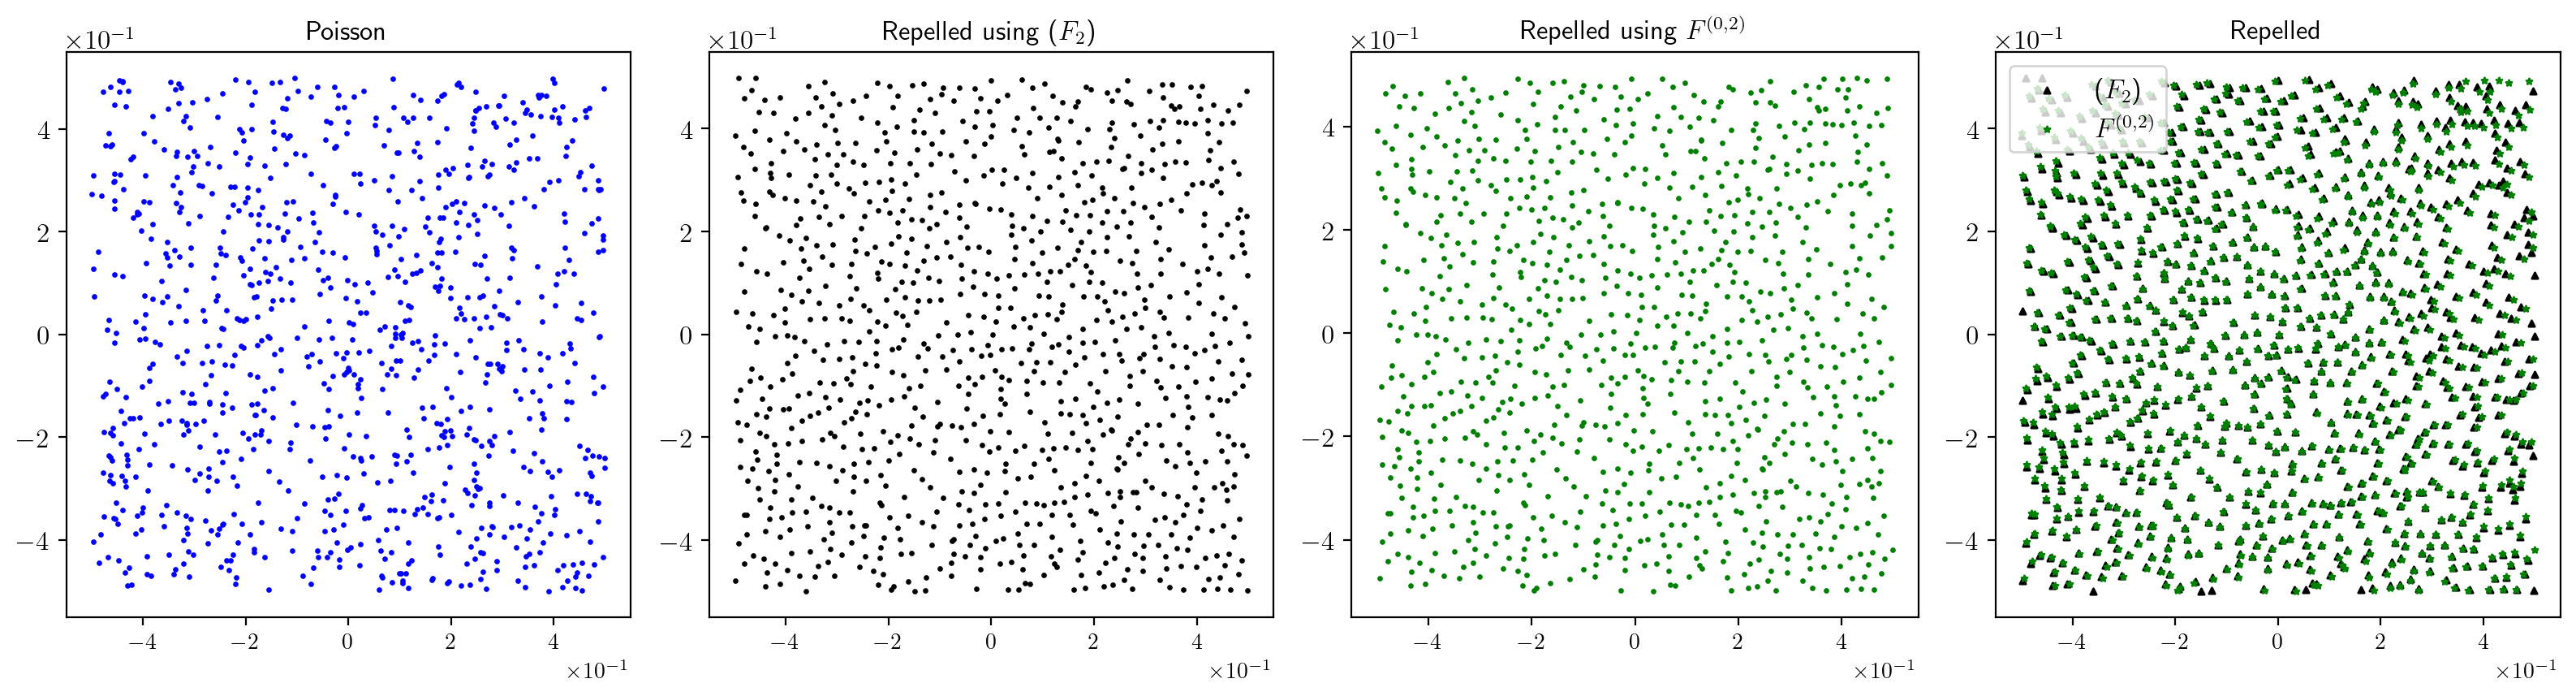

In [82]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
poisson_pp_1.plot(axis=ax[0], window=window, s=2, c="b")
ax[0].set_title("Poisson")
repelled_pp_1.plot(axis=ax[1], window=window, s=2, c="k")
ax[1].set_title(r"Repelled using ($F_2$)")
repelled_pp_2.plot(axis=ax[2], window=window, s=2, c="g")
ax[2].set_title(r"Repelled using $F^{(0,2)}$")
repelled_pp_1.plot(axis=ax[3], window=window, c="k", marker="^", s=7, label=r"($F_2$)")
repelled_pp_2.plot(axis=ax[3], window=window, c="g", marker="*", s=7, label=r"$F^{(0,2)}$")
ax[3].set_title(r"Repelled")
ax[3].legend()
plt.tight_layout()
plt.savefig("poisson_and_repelled_2D.pdf")
plt.show()

In [83]:
# d=3
d=3
l = 1
r = math.sqrt(d)*(l/2)
window = BoxWindow(bounds=[[-l/2, l/2]]*d)
# for repelled with (F2)
simulation_window_1 = BallWindow(center=[0]*d, radius=r)
# for repelled with (F^(0,2))
simulation_window_2 = BallWindow(center=[0]*d, radius=3*r)

# Poisson
intensity = 1000
poisson = HomogeneousPoissonPointProcess(intensity)
poisson_pp_2 = poisson.generate_point_pattern(window=simulation_window_2, seed=122)
poisson_pp_1 = poisson_pp_2.restrict_to_window(simulation_window_1)

# Repelled Poisson
nb_cores = 3
## Repelled with (F2)
rpp_1 = RepelledPointProcess(poisson_pp_1)
repelled_pp_1 = rpp_1.repelled_point_pattern(nb_cores=nb_cores)
## Repelled with (F^(0,2))

rpp_2 = RepelledPointProcess(poisson_pp_2)
repelled_pp_2 = rpp_2.repelled_point_pattern(p=r,nb_cores=nb_cores)

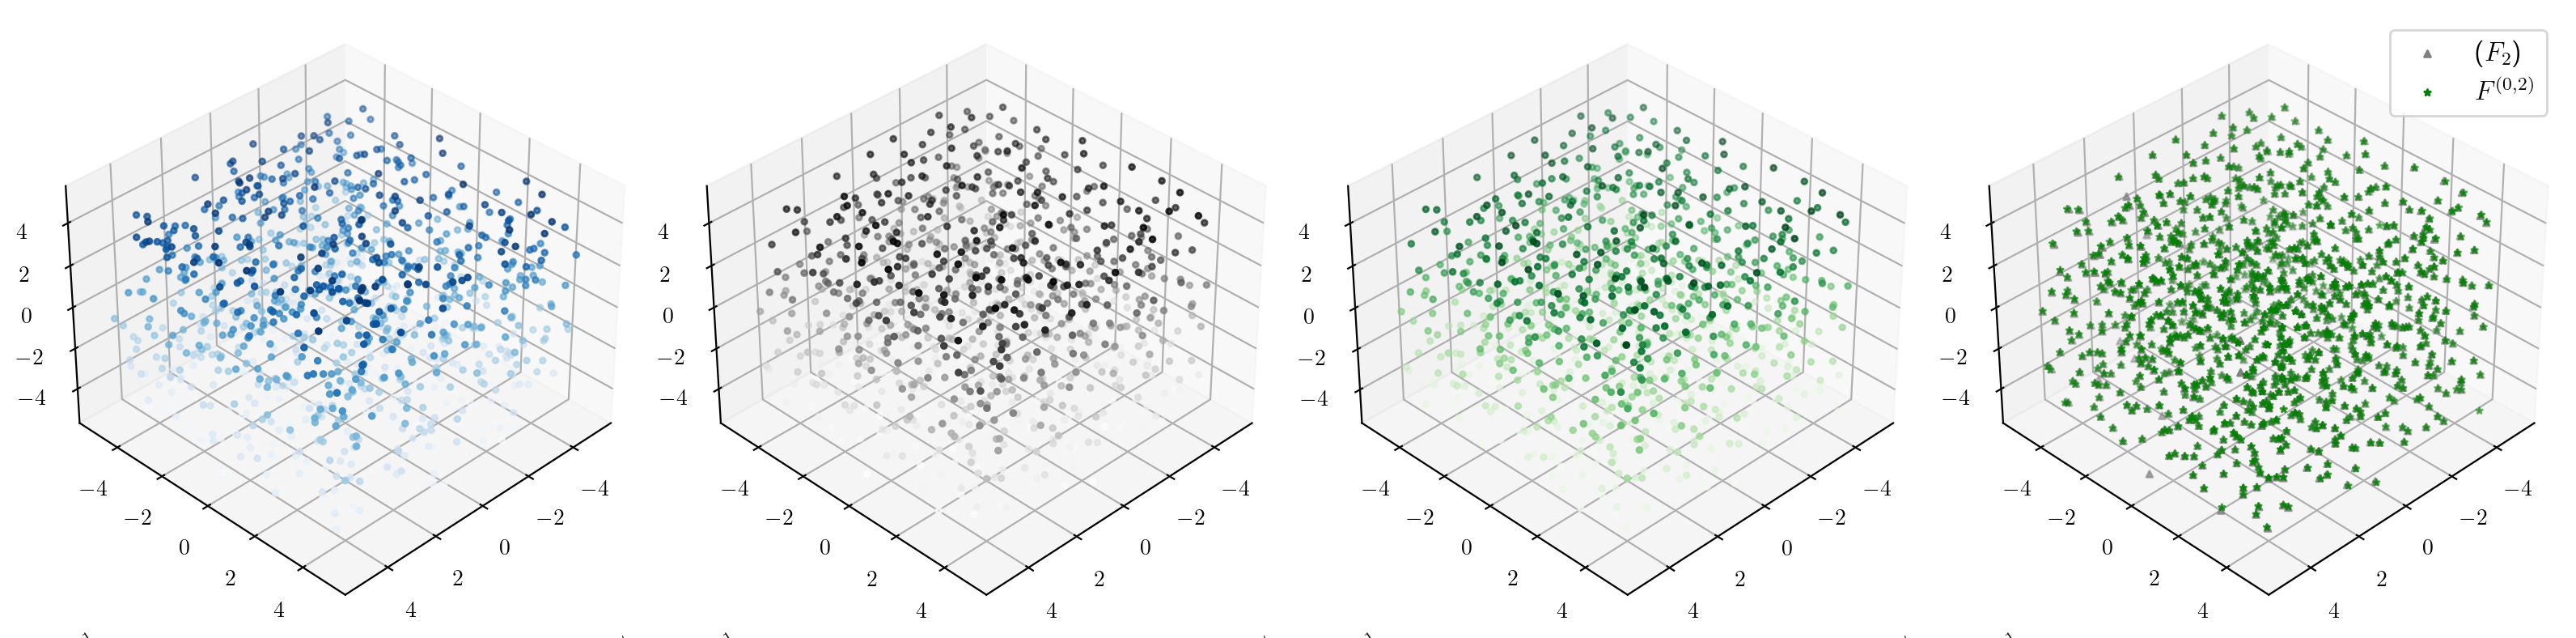

In [102]:
points_1 = poisson_pp_1.restrict_to_window(window).points
points_2 = repelled_pp_1.restrict_to_window(window).points
points_3 = repelled_pp_2.restrict_to_window(window).points
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter3D(points_1[:, 0], points_1[:, 1], points_1[:, 2], c=points_1[:, 2], cmap='Blues', s=6, rasterized=True)
ax.view_init(elev=35, azim=45)
ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.scatter3D(points_2[:, 0], points_2[:, 1], points_2[:, 2], c=points_2[:, 2], cmap='Greys', s=6, rasterized=True)
ax.view_init(elev=35, azim=45)
ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter3D(points_3[:, 0], points_3[:, 1], points_3[:, 2], c=points_3[:, 2], cmap='Greens', s=6, rasterized=True)
ax.view_init(elev=35, azim=45)
ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter3D(points_2[:, 0], points_2[:, 1], points_2[:, 2], c="grey", marker="^", label=r"($F_2$)", s=8, rasterized=True)
ax.scatter3D(points_3[:, 0], points_3[:, 1], points_3[:, 2], c="g", marker="*", label=r"$F^{(0,2)}$", s=8, rasterized=True)
ax.view_init(elev=35, azim=45)
ax.legend()
plt.tight_layout()
plt.savefig("poisson_and_repelled_3D.pdf")
plt.show()

# 2- Figures of Section 6

In [48]:
def sphere_number(p,q, d):
    r = (p-q)/2
    window = BallWindow(center= [0]*d, radius=q + r)
    return window.surface/(2*r**(d-1))
def next_points(a_0, p, q):
    r = (p-q)/2
    x_1 = (q**2-r**2 + 2*q*r)/(q+r)
    return np.array([[x_1, np.sqrt((q+r)**2 - x_1**2)], [x_1, - np.sqrt((q+r)**2 - x_1**2)]])
def next_points_2(a, p, q):
    r = (p-q)/2
    b_ = (4*r**2*a[1]**2 - 2*a[1]*(q+r)**2)
    a_ = a[1]**2 + a[0]**2 
    c_ = (q + r)**4 + 4*r**4 - 4*r**2*(q + r)**2 - a[0]**2*(q+r)**2
    delta = b_**2 - 4*a_*c_
    print(delta)
    x_2 = [(-b_-np.sqrt(delta))/(2*a_), (-b_+np.sqrt(delta))/(2*a_)]
    print(x_2)
    x_1 = [((q+r)**2 - 2*r**2 - x_2[0]*a[1])/a[1], ((q+r)**2 - 2*r**2 - x_2[1]*a[1])/a[1]]
    return np.array([[x_1[0], x_2[0]], [x_1[1], x_2[1]]]) 

In [49]:
epsilon = 0.5
x = np.array([3,76])
a_0 = [76, 0]
d=2
origin = [0]*d
norm_x = np.linalg.norm(x)
R=8
r=R/epsilon
p, q = norm_x + r, norm_x - r
sphere_nb = sphere_number(p=p, q=q, d=d)
points_next = next_points(a_0, p, q)
print(np.linalg.norm(points_next, axis=1))


[76.05918748 76.05918748]


In [50]:

print("sphere number=", sphere_nb)
window0 = BallWindow(center=origin, radius=norm_x)
window1 = BallWindow(center=origin, radius=R)
window2 = BallWindow(center=origin, radius=norm_x-R/epsilon)
window3 = BallWindow(center=origin, radius=norm_x + R/epsilon)
window4 = BallWindow(center=x, radius=R/epsilon)
window5 = BallWindow(center=[np.sqrt((q+r)**2 - (q/(q+r))**2), q/(q+r)], radius=r)
window6 = BallWindow(center=points_next[0,:], radius=r)
window7 = BallWindow(center=points_next[1,:], radius=r)

sphere number= 14.934186538921509


7


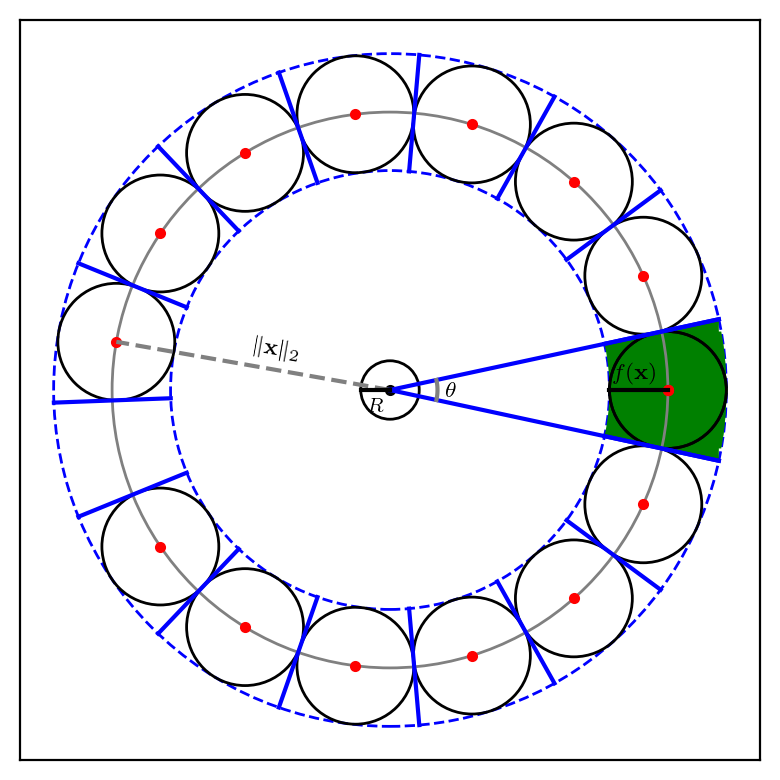

In [52]:
theta = np.arcsin(r/norm_x)
alpha = np.linspace(-theta, theta, 100)
u, v = (R+5)*np.cos(alpha), (R+5)*np.sin(alpha)
nb_theta = int(180/(theta*57.2958)/2)
print(nb_theta)

fig, ax = plt.subplots(figsize=(4,4))
window3.plot(axis=ax, color="b", linestyle="--")
window2.plot(axis=ax, color="b", linestyle="--")
ax.plot(0, 0, "k.")
plt.plot(a_0[0], a_0[1], 'r.')
plt.fill_between([norm_x-r,np.cos(theta)*(norm_x+r)], 
                 [np.sin(theta)*(norm_x-r), np.sin(theta)*(norm_x+r)], 
                 [-np.sin(theta)*(norm_x-r), -np.sin(theta)*(norm_x+r)], facecolor='green', interpolate=True)
y_ = np.linspace(-np.sin(theta)*(norm_x-r), np.sin(theta)*(norm_x-r))
plt.fill_betweenx(y_, np.sqrt((norm_x -r)**2 - y_**2), np.sqrt((norm_x + r)**2 - y_**2),
                  facecolor='green', interpolate=True)
y_ = np.linspace(-np.sin(theta)*(norm_x), np.sin(theta)*(norm_x))
plt.fill_betweenx(y_, np.sqrt((norm_x)**2 - y_**2), np.sqrt((norm_x + r)**2 - y_**2),
                  facecolor='green', interpolate=True)
for i in range(0, nb_theta ):
    a,b= np.cos(2*i*theta)*norm_x, np.sin(2*i*theta)*norm_x
    window = BallWindow(center=[a,b ], radius=r)
    window.plot(axis=ax, color="k")
    plt.plot(a, b, 'r.')
    window = BallWindow(center=[a,-b ], radius=r)
    window.plot(axis=ax, color="k")
    plt.plot(a, -b, 'r.')
    plt.plot([np.cos((2*i+1)*theta)*(norm_x-r), np.cos((2*i+1)*theta)*(norm_x+r)], 
             [np.sin((2*i+1)*theta)*(norm_x-r), np.sin((2*i+1)*theta)*(norm_x+r)], 'b' )
    plt.plot([np.cos((2*i+1)*theta)*(norm_x-r), np.cos((2*i+1)*theta)*(norm_x+r)], 
             [-np.sin((2*i+1)*theta)*(norm_x-r), -np.sin((2*i+1)*theta)*(norm_x+r)], 'b' )
c, d = np.cos(2*7*theta)*norm_x, np.sin(2*7*theta)*norm_x
window = BallWindow(center=[c,d ], radius=r)
window.plot(axis=ax, color="k")
plt.plot(c, d, 'r.')
plt.plot([0, c], [0, d], 'grey', linestyle="--")
plt.gca().annotate(r'$\|\mathbf{x}\|_2$', xy=(c/2, d -5), xycoords='data', fontsize=8, rotation=-10)
plt.plot([0,  np.cos(theta)*(norm_x+r)], 
        [0, np.sin(theta)*(norm_x+r)], 'b' )
plt.plot([0, np.cos(theta)*(norm_x+r)], 
        [0, -np.sin(theta)*(norm_x+r)], 'b' )
plt.plot([np.cos(15*theta)*(norm_x-r), np.cos(15*theta)*(norm_x+r)], 
             [np.sin((15)*theta)*(norm_x-r), np.sin((15)*theta)*(norm_x+r)], 'b' )
plt.plot([norm_x-r,norm_x],[0, 0], 'k' )
plt.gca().annotate(r'$f(\mathbf{x})$', xy=(norm_x -15, 3), xycoords='data', fontsize=8)
plt.plot([0,-8],[0, 0], 'k' )
plt.gca().annotate(r'$R$', xy=(-6, -6), xycoords='data', fontsize=7)
window1.plot(axis=ax, color="k")
window0.plot(axis=ax, color="grey", linestyle="-")
plt.plot(u,v, "grey")
plt.gca().annotate(r'$\theta$', xy=(R+7, -2), xycoords='data', fontsize=8)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.tight_layout()
plt.savefig("proof_existance_pic.pdf")
plt.show()


# 3- Figures of Section 4

In [14]:
from mcrppy.monte_carlo_methods import mc_results, dataframe_error_test, dataframe_mse_results, dataframe_residual_test
from mcrppy.plot_functions import plot_mc_results, qq_plot_residual
from mcrppy.integrand_test_functions import (exact_integral_f_1, 
                                             exact_integral_f_2,
                                             exact_integral_f_3)

In [196]:
fct_list = [f_1, f_2, f_3]
fct_names = ["f_1", "f_2", "f_3"]
estimators = ["MC", "MCRB", "MCCV",  "RQMC", "MCDPP"]
 


## d=2

In [197]:

import pickle
with open('data/mc_results_2d_final.pickle', 'rb') as file:
    mc_results_dict = pickle.load(file)
d =  mc_results_dict["d"]
mc_results_2d = mc_results_dict["mc_result"]
nb_points_2d = mc_results_dict["nb_point_list"]

In [198]:
exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d), 
                  ]
support_window = support_integrands(d)

 Variance

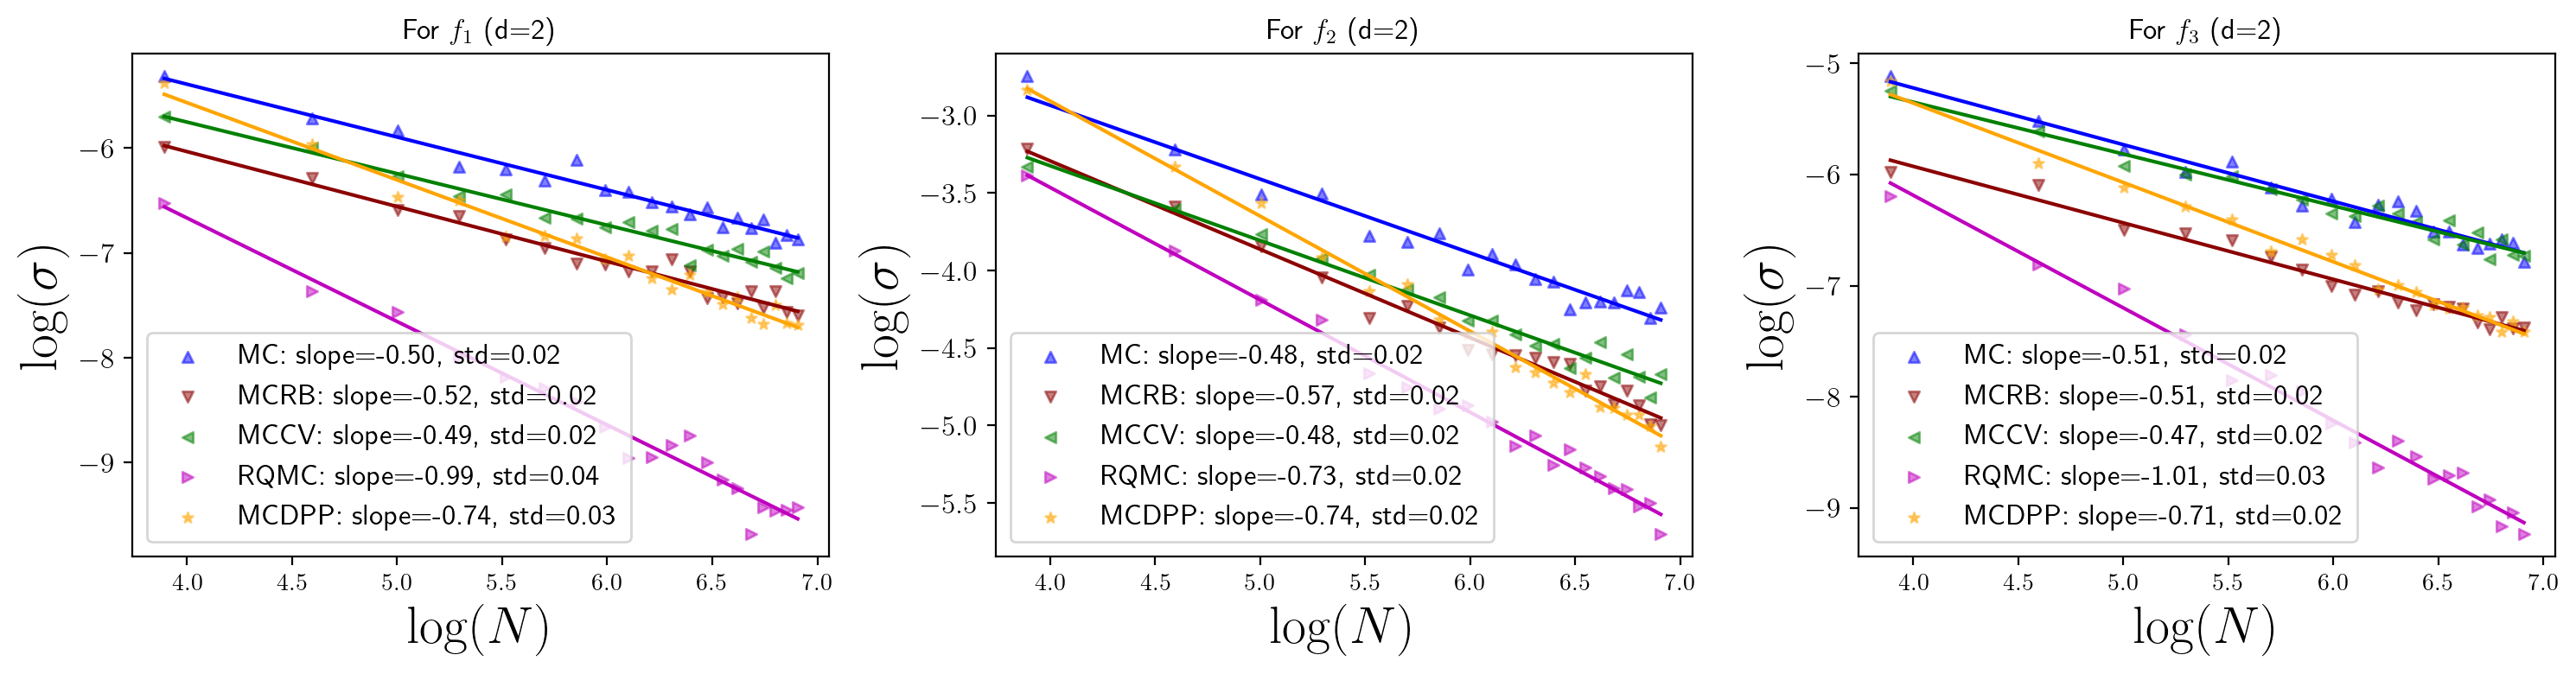

In [199]:
plot_mc_results(d, 
                mc_results_2d, 
                nb_points_2d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False,
                estimators=estimators,
                save_fig="std_mc_2_d.pdf"
               )

In [200]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=mc_results_2d, 
                        nb_points_list=nb_points_2d, 
                        fct_names=fct_names, 
                        test_type="SW")

Normality test of residuals of the linear regression:


f_1                    f_2                    f_3
MC      (stat=0.952, p=0.399)  (stat=0.964, p=0.619)  (stat=0.975, p=0.863)
MCRB   (stat=0.897, p=0.0355)  (stat=0.977, p=0.883)  (stat=0.965, p=0.645)
MCCV    (stat=0.939, p=0.232)   (stat=0.976, p=0.87)  (stat=0.978, p=0.903)
RQMC    (stat=0.936, p=0.204)  (stat=0.965, p=0.655)  (stat=0.960, p=0.543)
MCDPP   (stat=0.965, p=0.652)  (stat=0.957, p=0.484)  (stat=0.968, p=0.716)

Error study

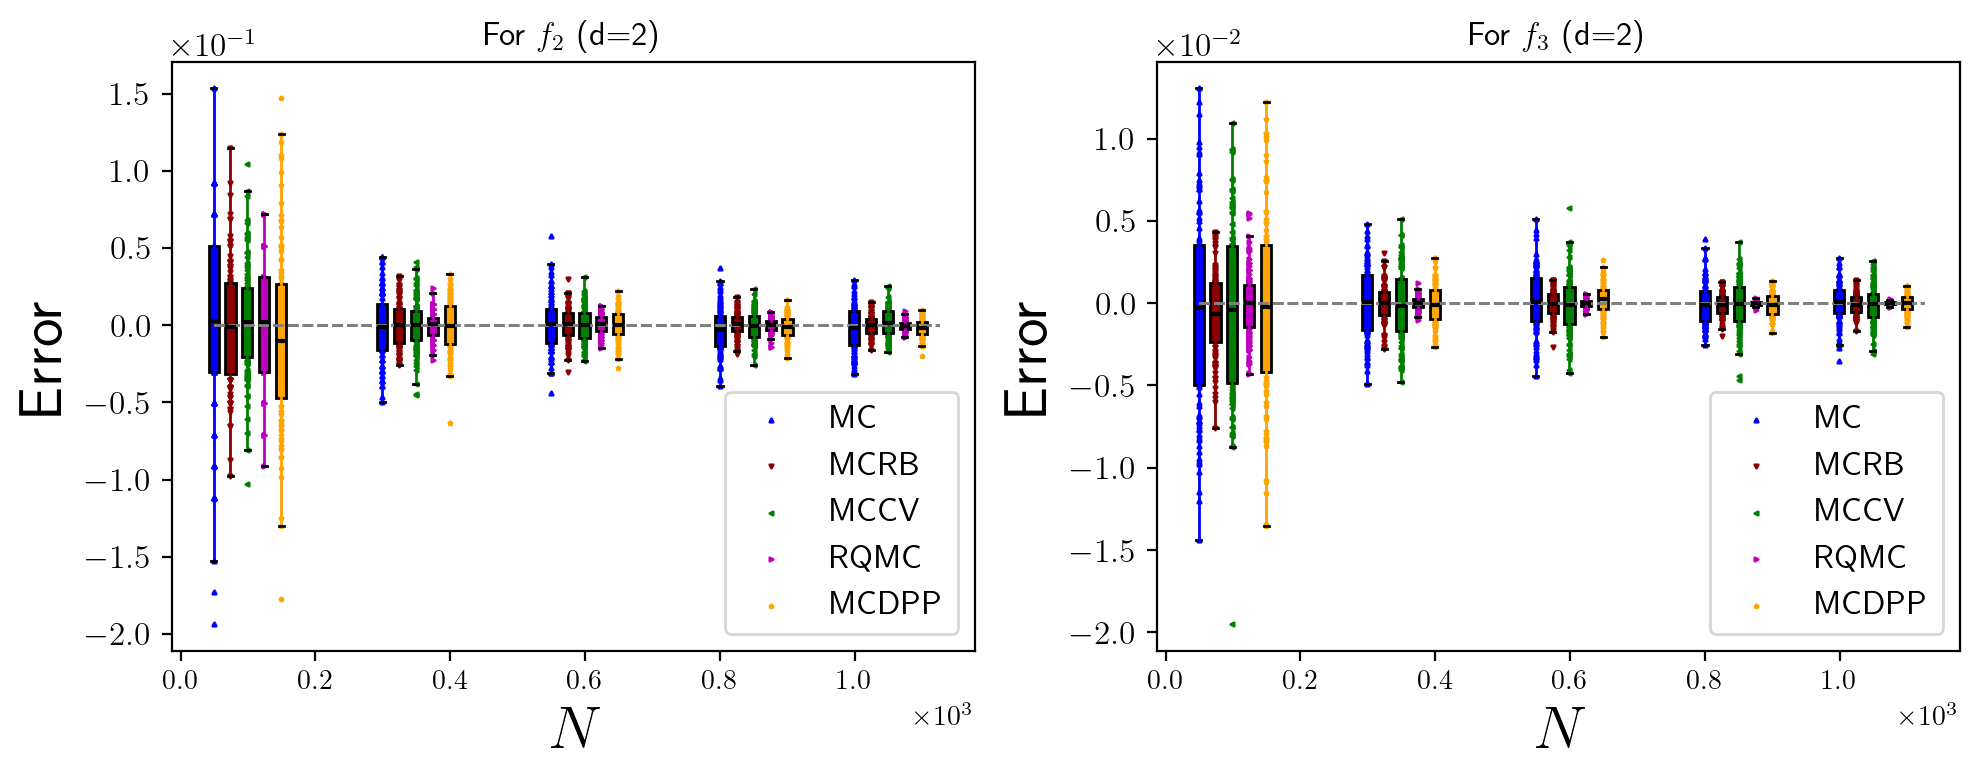

In [201]:
plot_mc_results(d=d, 
                mc_list=mc_results_2d, 
                nb_points_list=nb_points_2d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                nb_subsample_nb_points=5,
                estimators=estimators,
                save_fig="error_mc_2d.pdf"
               )

## d = 3

In [202]:

import pickle
with open('data/mc_results_3d_final.pickle', 'rb') as file:
    mc_results_3d_dict = pickle.load(file)
d =  mc_results_3d_dict["d"]
print("d=", d)
mc_results_3d = mc_results_3d_dict["mc_result"]
nb_points_3d = mc_results_3d_dict["nb_point_list"]

exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d),  
                  ]
support_window = support_integrands(d) 

d= 3



variance

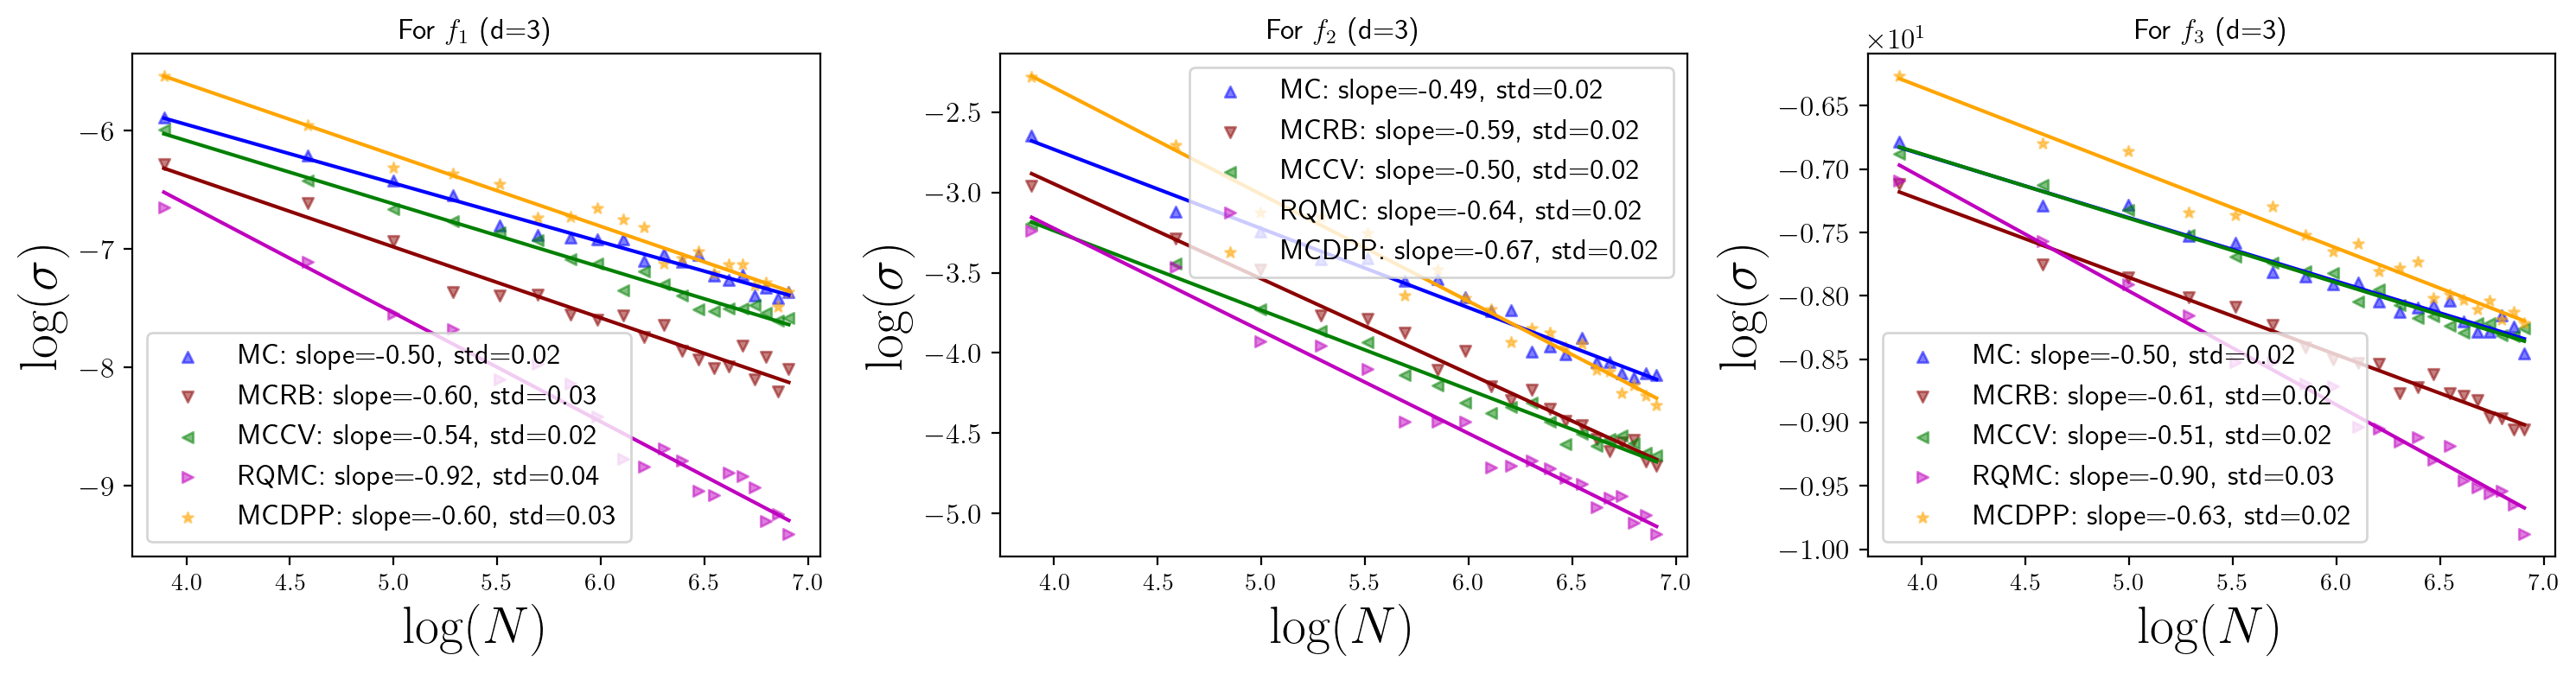

In [203]:
plot_mc_results(d, 
                mc_results_3d, 
                nb_points_3d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False,
                estimators=estimators,
                save_fig="std_mc_3_d.pdf"
               )

In [204]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=mc_results_3d, 
                        nb_points_list=nb_points_3d, 
                        fct_names=fct_names, 
                        test_type="SW")

Normality test of residuals of the linear regression:


f_1                    f_2                    f_3
MC     (stat=0.973, p=0.811)  (stat=0.971, p=0.767)  (stat=0.958, p=0.511)
MCRB   (stat=0.957, p=0.483)  (stat=0.942, p=0.264)  (stat=0.979, p=0.915)
MCCV   (stat=0.932, p=0.171)  (stat=0.954, p=0.439)  (stat=0.969, p=0.727)
RQMC   (stat=0.945, p=0.297)  (stat=0.962, p=0.582)  (stat=0.989, p=0.997)
MCDPP  (stat=0.970, p=0.751)  (stat=0.941, p=0.247)  (stat=0.956, p=0.469)

Error

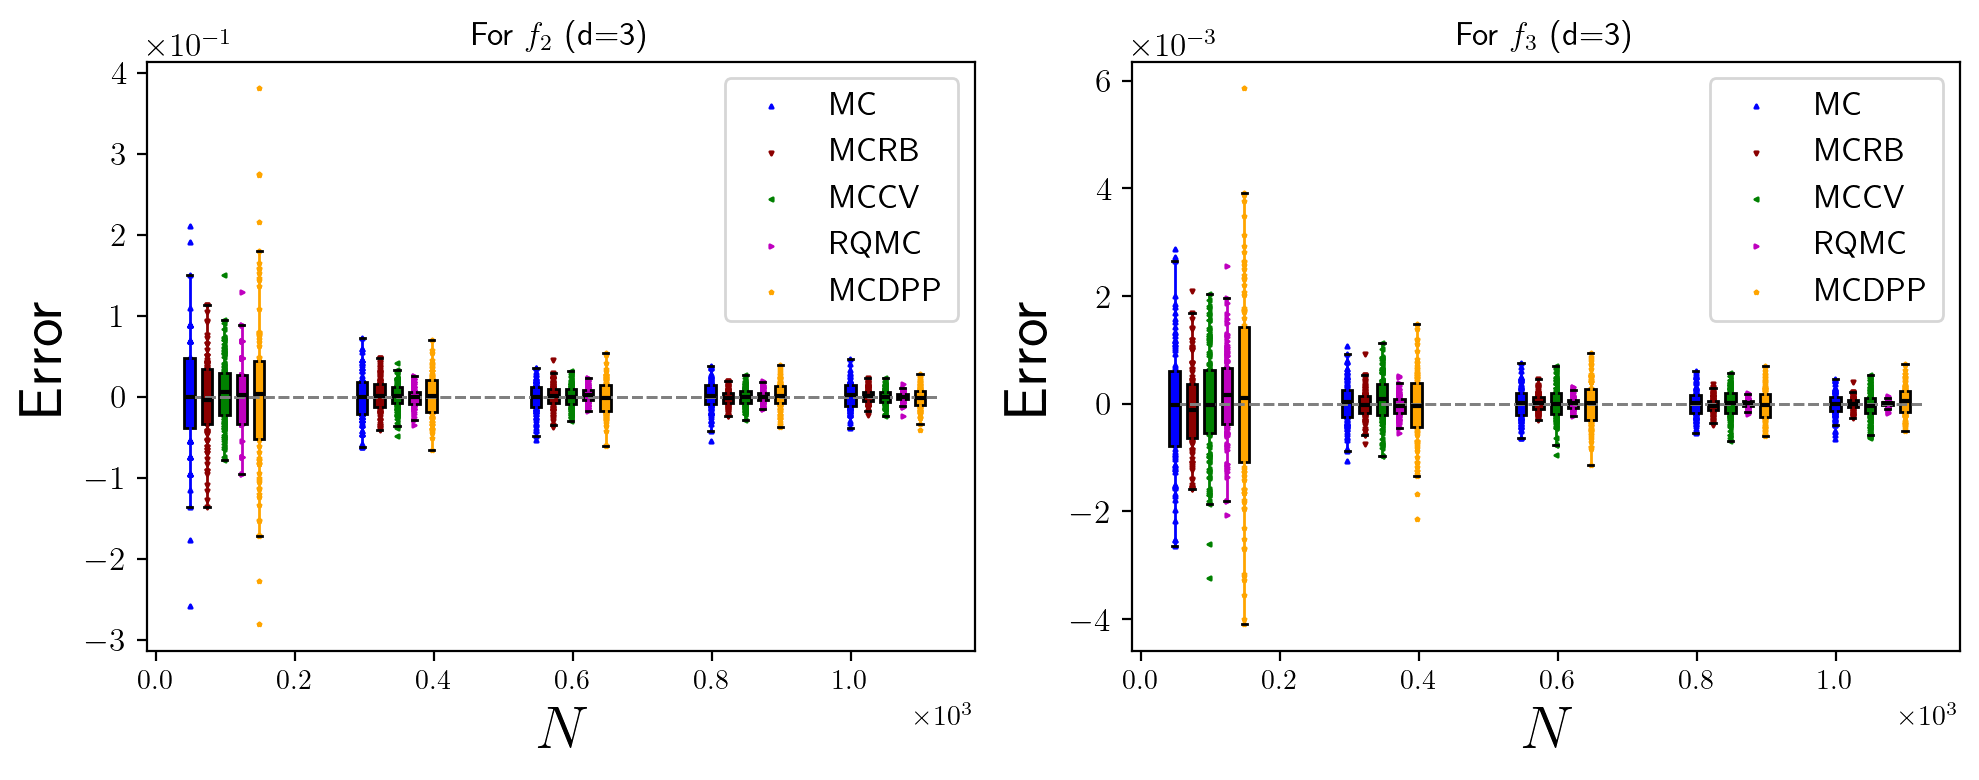

In [205]:
plot_mc_results(d=d, 
                mc_list=mc_results_3d, 
                nb_points_list=nb_points_3d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                nb_subsample_nb_points=5,
                #log_scale=True,
                estimators=estimators,
                save_fig="error_mc_3d.pdf"
               )

## d=4

In [206]:

import pickle
with open('data/mc_results_4d_final.pickle', 'rb') as file:
    mc_results_dict = pickle.load(file)
    
d =  mc_results_dict["d"]
mc_results_4d = mc_results_dict["mc_result"]
nb_points_4d = mc_results_dict["nb_point_list"]

exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d), 
                  ]
support_window = support_integrands(d)
estimators = ["MC", "MCRB", "MCCV",  "RQMC"]

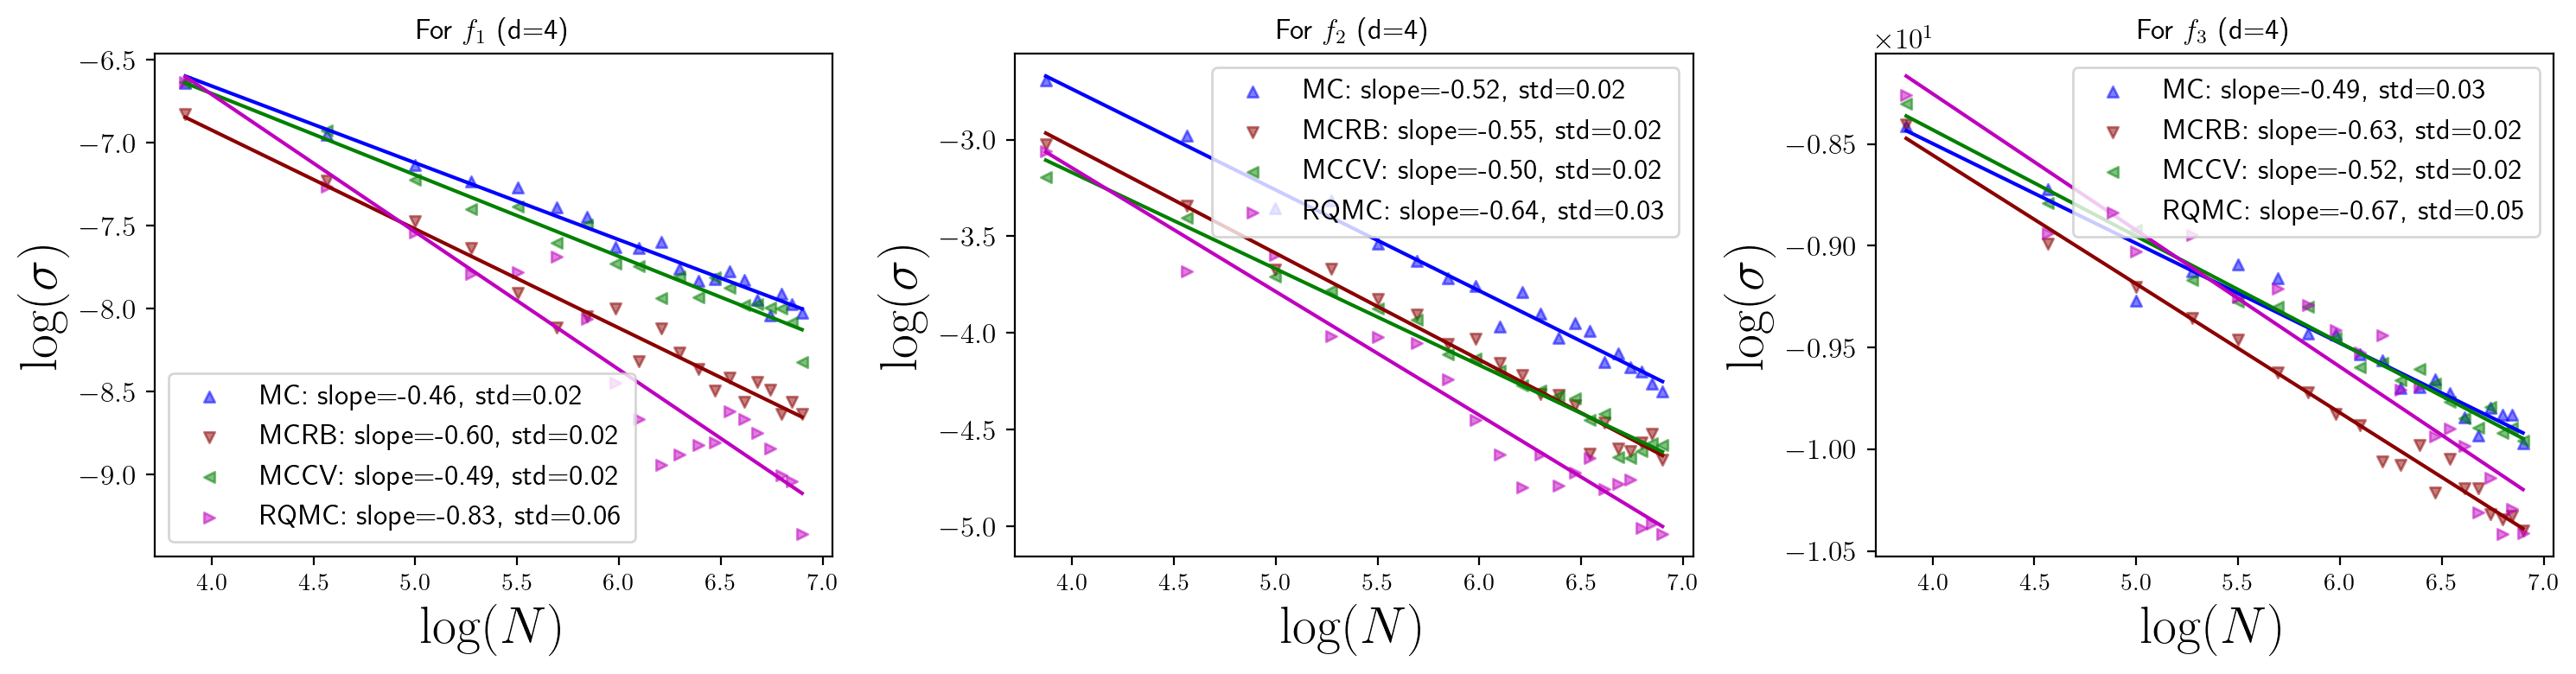

In [207]:
plot_mc_results(d, 
                mc_results_4d, 
                nb_points_4d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False,
                estimators=estimators,
                save_fig="std_mc_4_d.pdf"
               )

In [208]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=mc_results_4d, 
                        nb_points_list=nb_points_4d, 
                        fct_names=fct_names, 
                        test_type="SW")

Normality test of residuals of the linear regression:


f_1                     f_2                     f_3
MC    (stat=0.962, p=0.593)   (stat=0.972, p=0.788)  (stat=0.906, p=0.0533)
MCRB   (stat=0.948, p=0.34)   (stat=0.932, p=0.167)   (stat=0.974, p=0.844)
MCCV  (stat=0.943, p=0.273)  (stat=0.914, p=0.0756)    (stat=0.940, p=0.24)
RQMC  (stat=0.977, p=0.893)   (stat=0.975, p=0.856)   (stat=0.952, p=0.391)

Error

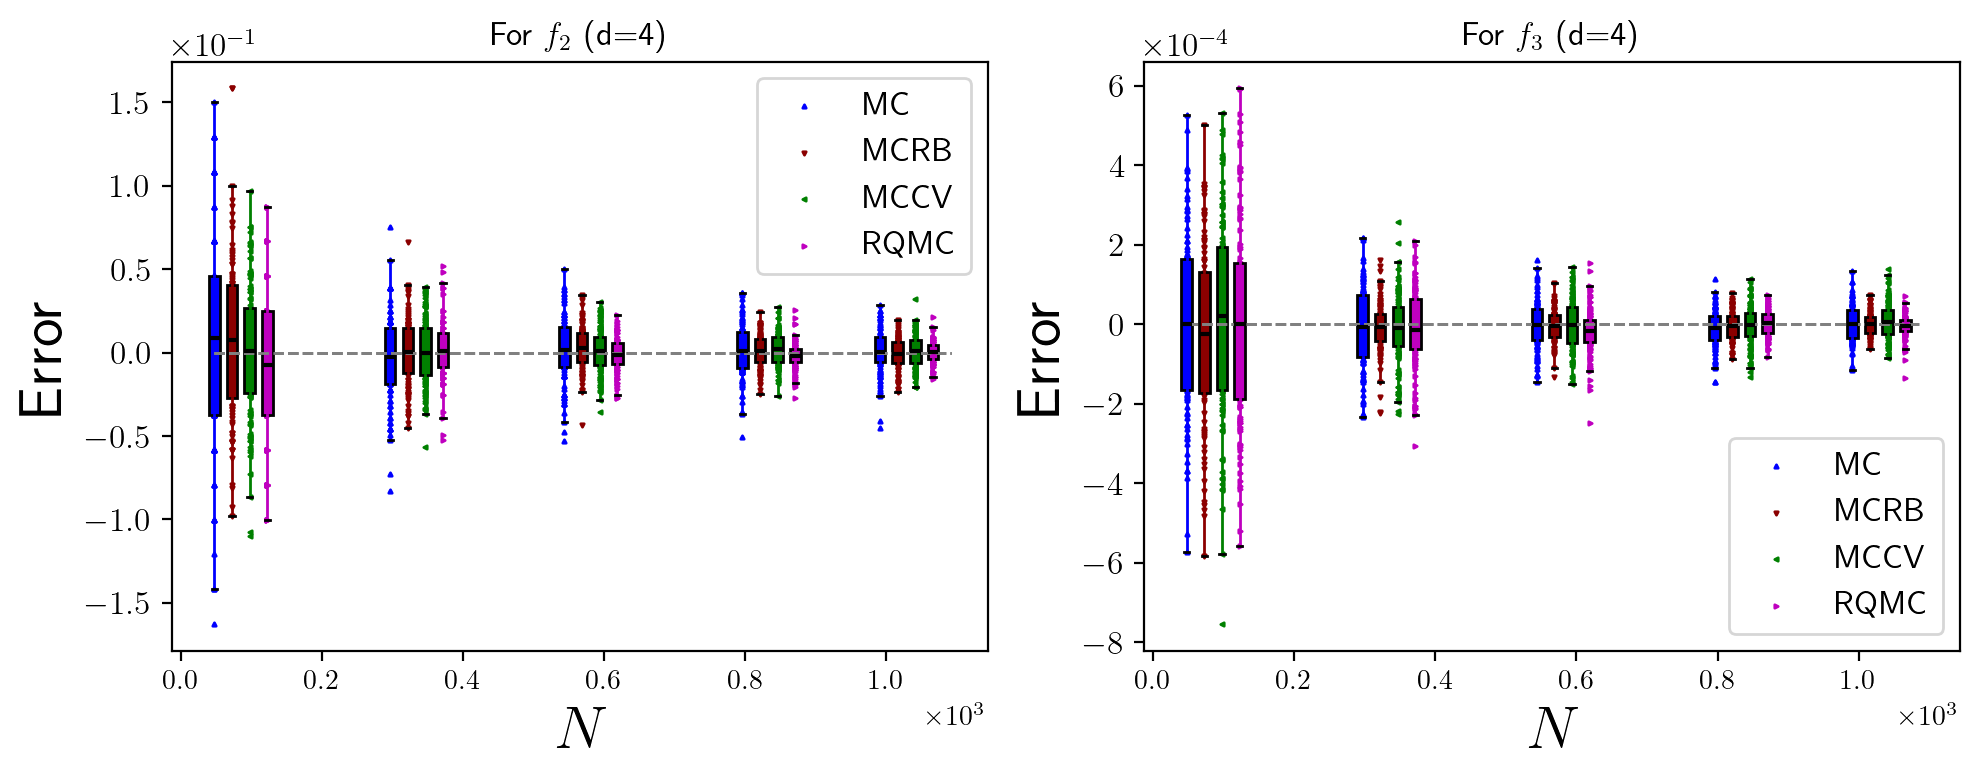

In [209]:
plot_mc_results(d=d, 
                mc_list=mc_results_4d, 
                nb_points_list=nb_points_4d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                nb_subsample_nb_points=5,
                estimators=estimators,
                save_fig="error_mc_4d.pdf"
               )

## d=5

In [210]:

import pickle
with open('data/mc_results_5d_final.pickle', 'rb') as file:
    mc_results_5d_dict = pickle.load(file)
d =  mc_results_5d_dict["d"]
print("d=", d)
mc_results_5d = mc_results_5d_dict["mc_result"]
nb_points_5d = mc_results_5d_dict["nb_point_list"]

exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d),  
                  ]
support_window = support_integrands(d) 

d= 5


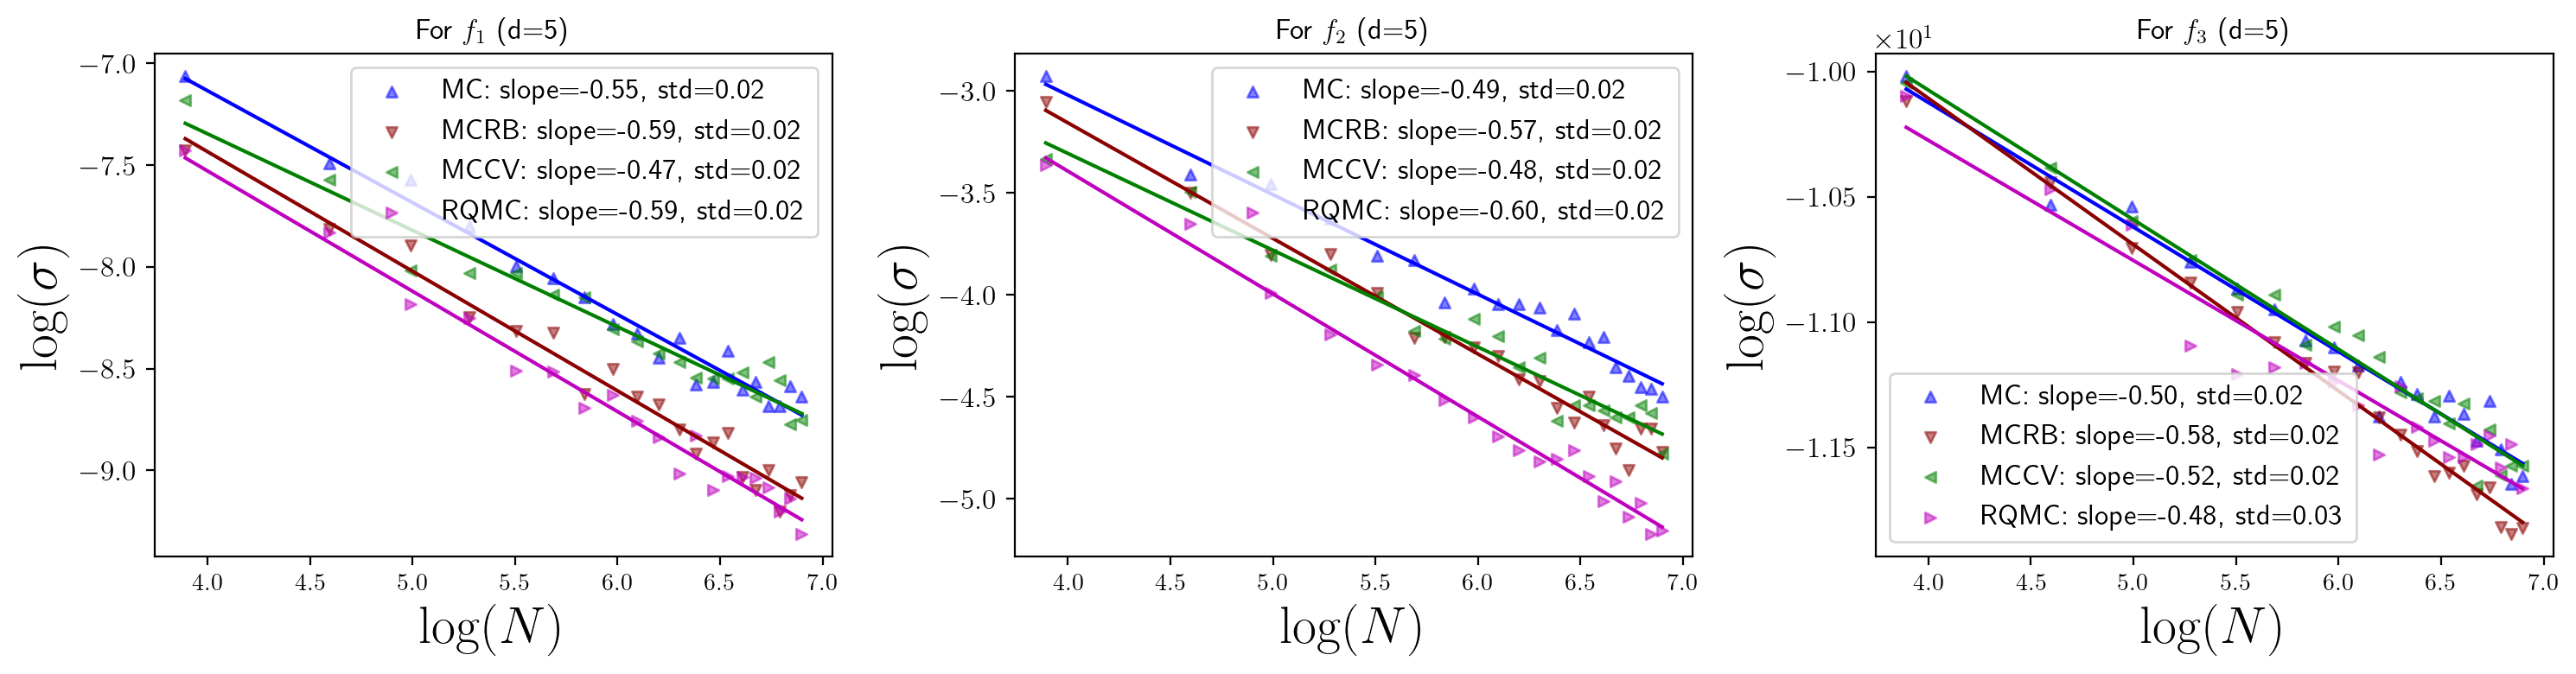

In [211]:
plot_mc_results(d, 
                mc_results_5d, 
                nb_points_5d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False,
                estimators=estimators,
                save_fig="std_mc_5_d.pdf"
               )

In [212]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=mc_results_5d, 
                        nb_points_list=nb_points_5d, 
                        fct_names=fct_names, 
                        test_type="SW")

Normality test of residuals of the linear regression:


f_1                     f_2                     f_3
MC    (stat=0.965, p=0.655)   (stat=0.982, p=0.962)   (stat=0.968, p=0.715)
MCRB  (stat=0.952, p=0.396)   (stat=0.963, p=0.608)   (stat=0.947, p=0.326)
MCCV  (stat=0.957, p=0.479)   (stat=0.959, p=0.524)   (stat=0.929, p=0.146)
RQMC  (stat=0.939, p=0.225)  (stat=0.875, p=0.0142)  (stat=0.912, p=0.0684)

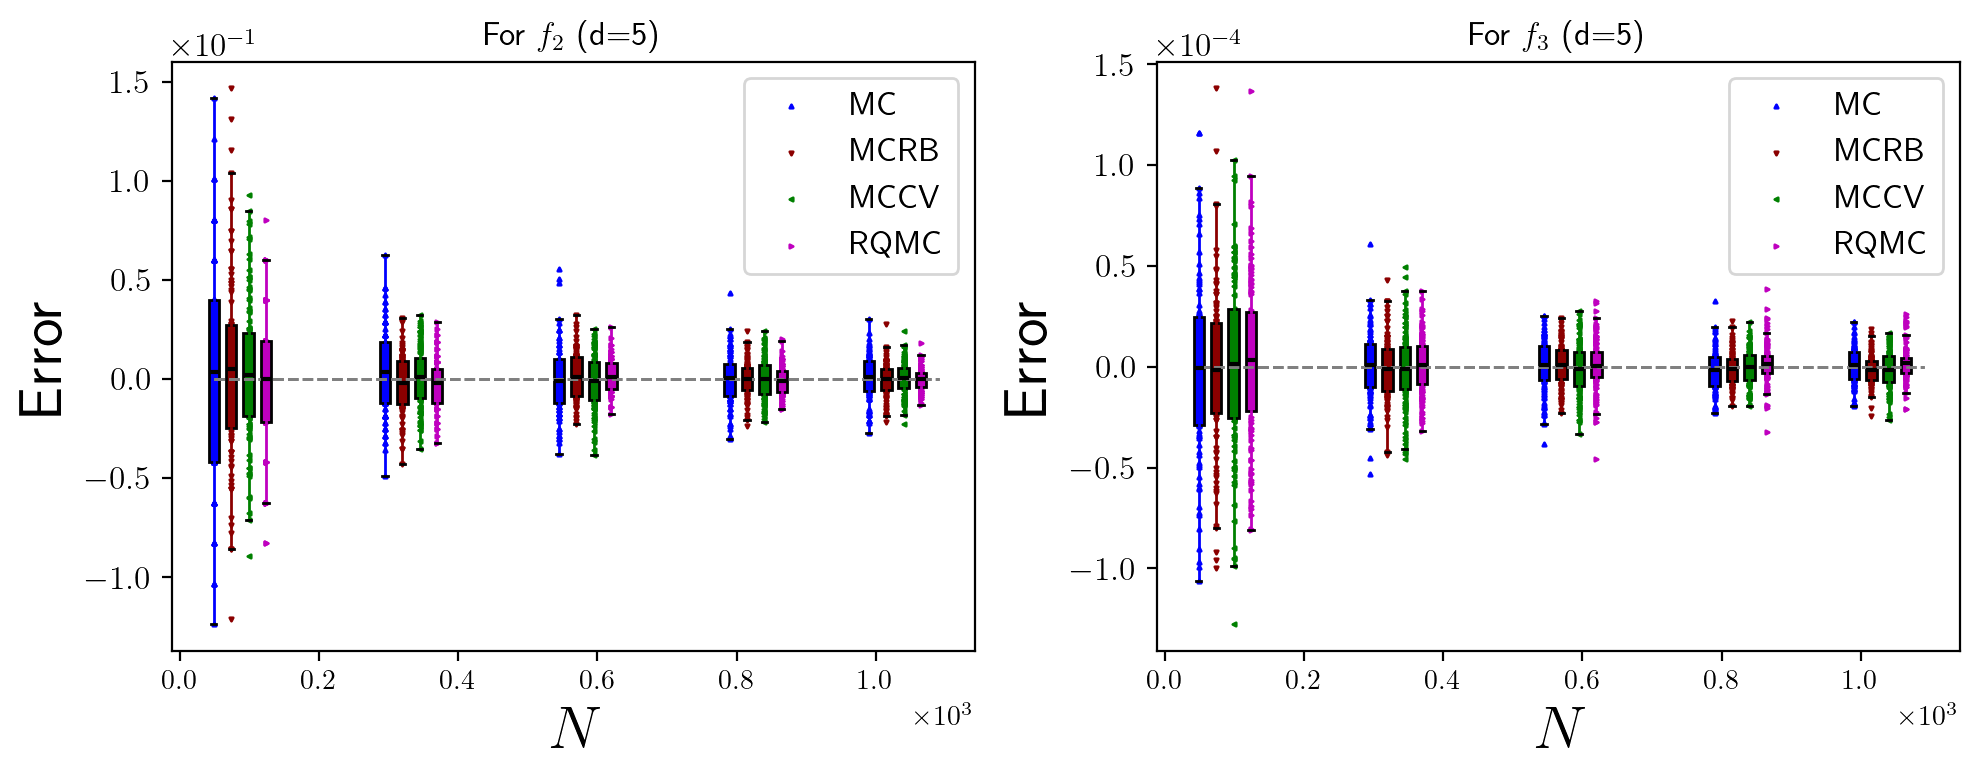

In [213]:
plot_mc_results(d=d, 
                mc_list=mc_results_5d, 
                nb_points_list=nb_points_5d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                nb_subsample_nb_points=5,
                estimators=estimators,
                save_fig="error_mc_5d.pdf"
               )

## d=7

In [90]:

import pickle
with open('data/mc_results_7d_final.pickle', 'rb') as file:
    mc_results_dict = pickle.load(file)
    
d =  mc_results_dict["d"]
mc_results_7d = mc_results_dict["mc_result"]
nb_points_7d = mc_results_dict["nb_point_list"]

exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d), 
                  ]
support_window = support_integrands(d)

d= 7


In [ ]:
plot_mc_results(d, 
                mc_results_7d, 
                nb_points_7d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False,
                estimators=estimators,
                save_fig="std_mc_7_d.pdf"
               )

In [ ]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=mc_results_7d, 
                        nb_points_list=nb_points_7d, 
                        fct_names=fct_names, 
                        test_type="SW")

# 4- Figures of Section 5

## 4.1- Recursive repulsion

In [128]:
d = 2
r = 1
simu_window = BallWindow(center=[0]*d, radius=r)
intensity = 800
t_stop = 50
# list of poisson pp
poisson = HomogeneousPoissonPointProcess(intensity)
poisson_pp = poisson.generate_point_pattern(window=simu_window, seed=1) 
# repelled pp
rpp = RepelledPointProcess(poisson_pp)
repelled = rpp.repelled_point_pattern()
repelled_t = rpp.repelled_point_pattern(stop_time=t_stop)
epsilon = epsilon_critical(d=d, intensity=intensity)
print("Epsilon=", epsilon)
repelled_inverse_t = rpp.repelled_point_pattern(epsilon=-epsilon, stop_time=t_stop)


Epsilon= 9.947183943243458e-05


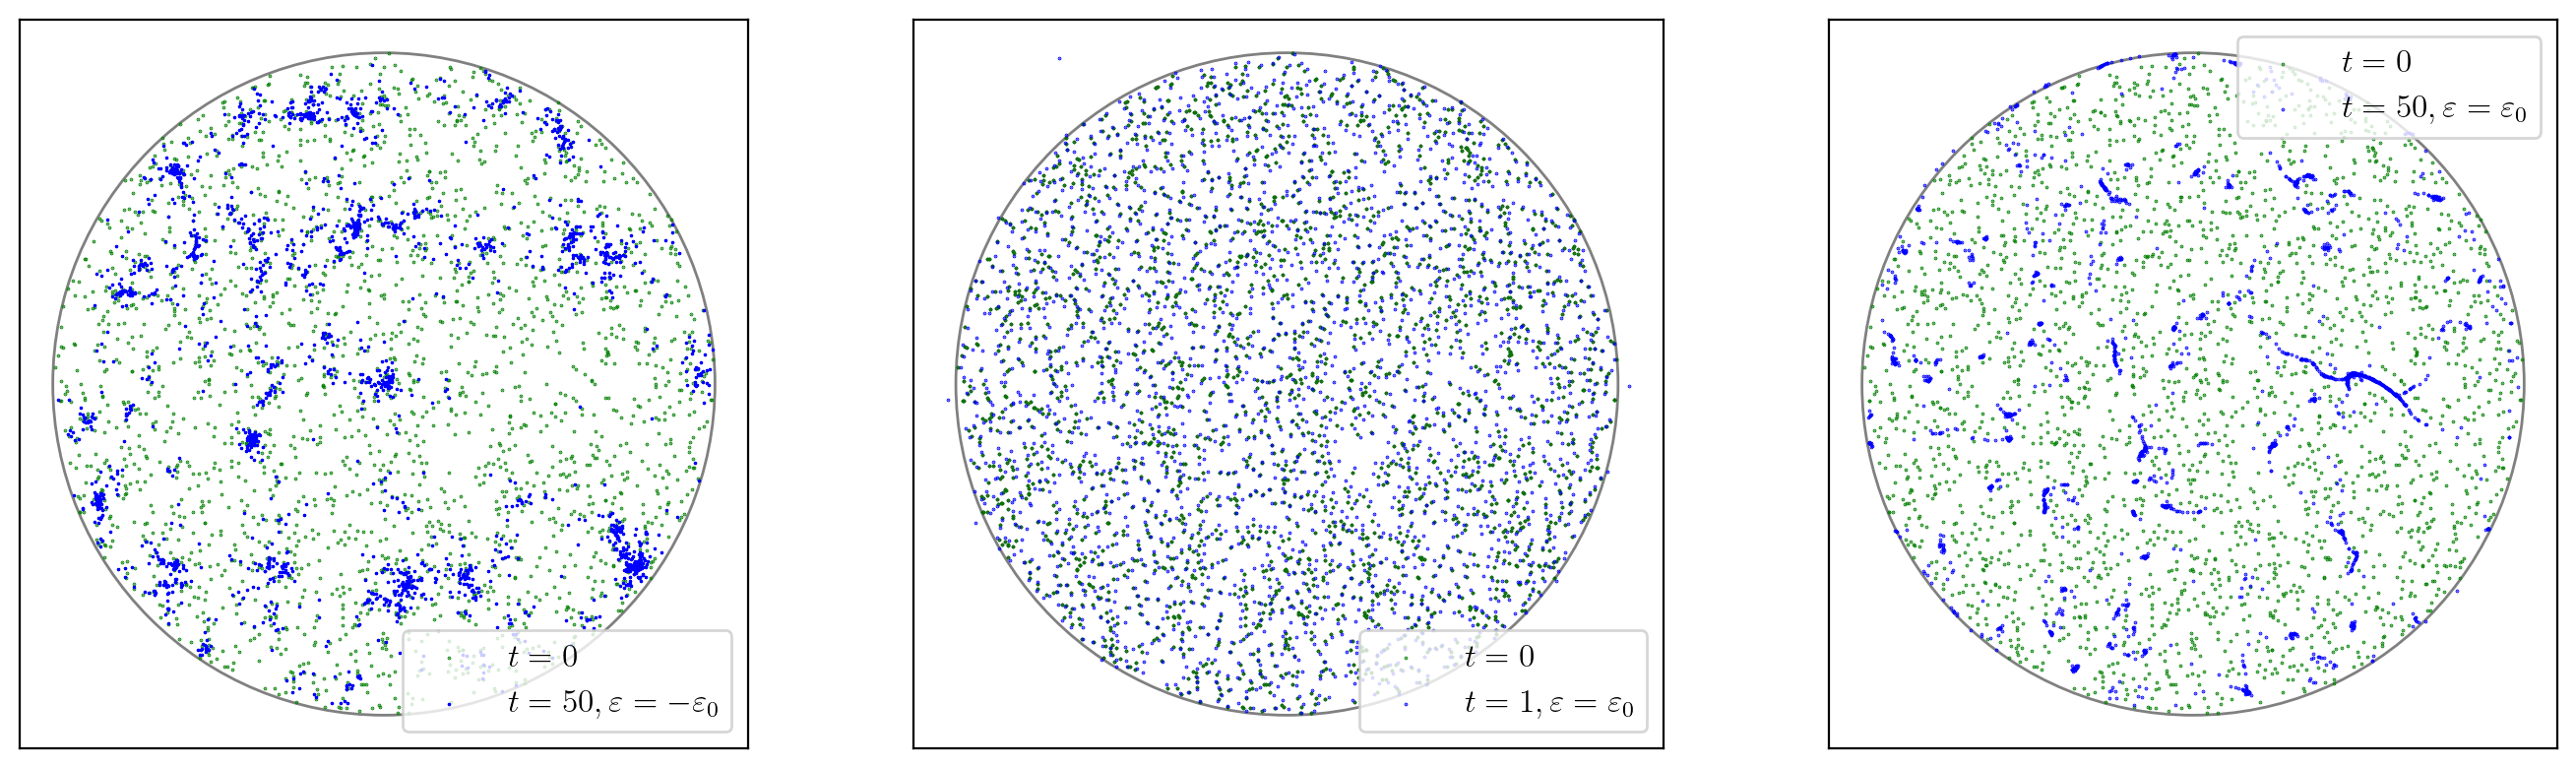

In [129]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
simu_window.plot(axis=ax[0], color="grey")
poisson_pp.plot(axis=ax[0], c="g", s=0.1, label=r"$t=0$")
repelled_inverse_t.plot(axis=ax[0], window=simu_window, c="b", s=0.1, marker="*", label=r"$t=50, \varepsilon = -\varepsilon_0$")
ax[0].legend()
ax[0].set_xticks([])
ax[0].set_yticks([])
simu_window.plot(axis=ax[1], color="grey")
poisson_pp.plot(axis=ax[1], s=0.1)
poisson_pp.plot(axis=ax[1], c="g", s=0.1, label=r"$t=0$")
repelled.plot(axis=ax[1], c="b", s=0.1, label=r"$t=1, \varepsilon=\varepsilon_0$")
ax[1].legend()
ax[1].set_xticks([])
ax[1].set_yticks([])
simu_window.plot(axis=ax[2], color="grey")
poisson_pp.plot(axis=ax[2], c="g", s=0.1, label=r"$t=0$")
repelled_t.plot(axis=ax[2], c="b", s=0.1, label=r"$t=50, \varepsilon=\varepsilon_0$")
ax[2].legend()
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.tight_layout()
plt.savefig("extreme_repelled.pdf")
plt.show()

## 4.2- Other model

In [215]:
import structure_factor
from mcrppy.point_pattern import PointPattern

def rescaled_point_pattern(point_pattern, window):
    if isinstance(window, BallWindow) or isinstance(window,structure_factor.spatial_windows.BallWindow):
        max_norm = window.radius
    else:
        max_norm = np.linalg.norm(window.bounds[0])
    max_norm_of_points = np.max(np.linalg.norm(point_pattern.points, axis=1))
    rescaled_points = point_pattern.points*max_norm/max_norm_of_points
    return PointPattern(rescaled_points, window=window)

def from_structure_factor_object_to_rppy(point_pattern):
    if isinstance(point_pattern.window, structure_factor.spatial_windows.BallWindow):
        window = BallWindow(center=point_pattern.window.center,
                    radius=point_pattern.window.radius)
    else:
        print( type(point_pattern.window))
        window = BoxWindow(bounds=point_pattern.window.bounds)
    return PointPattern(points=point_pattern.points, 
                        window=window,
                        intensity=point_pattern.intensity)

#### Repelled process

In [216]:
from mcrppy.point_processes import ScrambleSobolPointProcess, GinibrePointProcess

In [217]:
observation_window = BallWindow(center=[0,0], radius=40)
nb_points = observation_window.volume/np.pi
print("Nb points=", nb_points)
#for Ginibre
ginibre = GinibrePointProcess()
if __name__ == "__main__":
    ginibre_pp, repelled_ginibre_pp = ginibre.generate_repelled_point_pattern(window=observation_window, seed=1, output="simulation")

#for Sobol
sobol = ScrambleSobolPointProcess()
if __name__ == "__main__":
    sobol_pp, repelled_sobol_pp = sobol.generate_repelled_point_pattern(nb_points=nb_points, window=observation_window, seed=1, output="simulation") 

print(ginibre_pp.points.shape[0], sobol_pp.points.shape[0])

Nb points= 1600.0
1583 1598


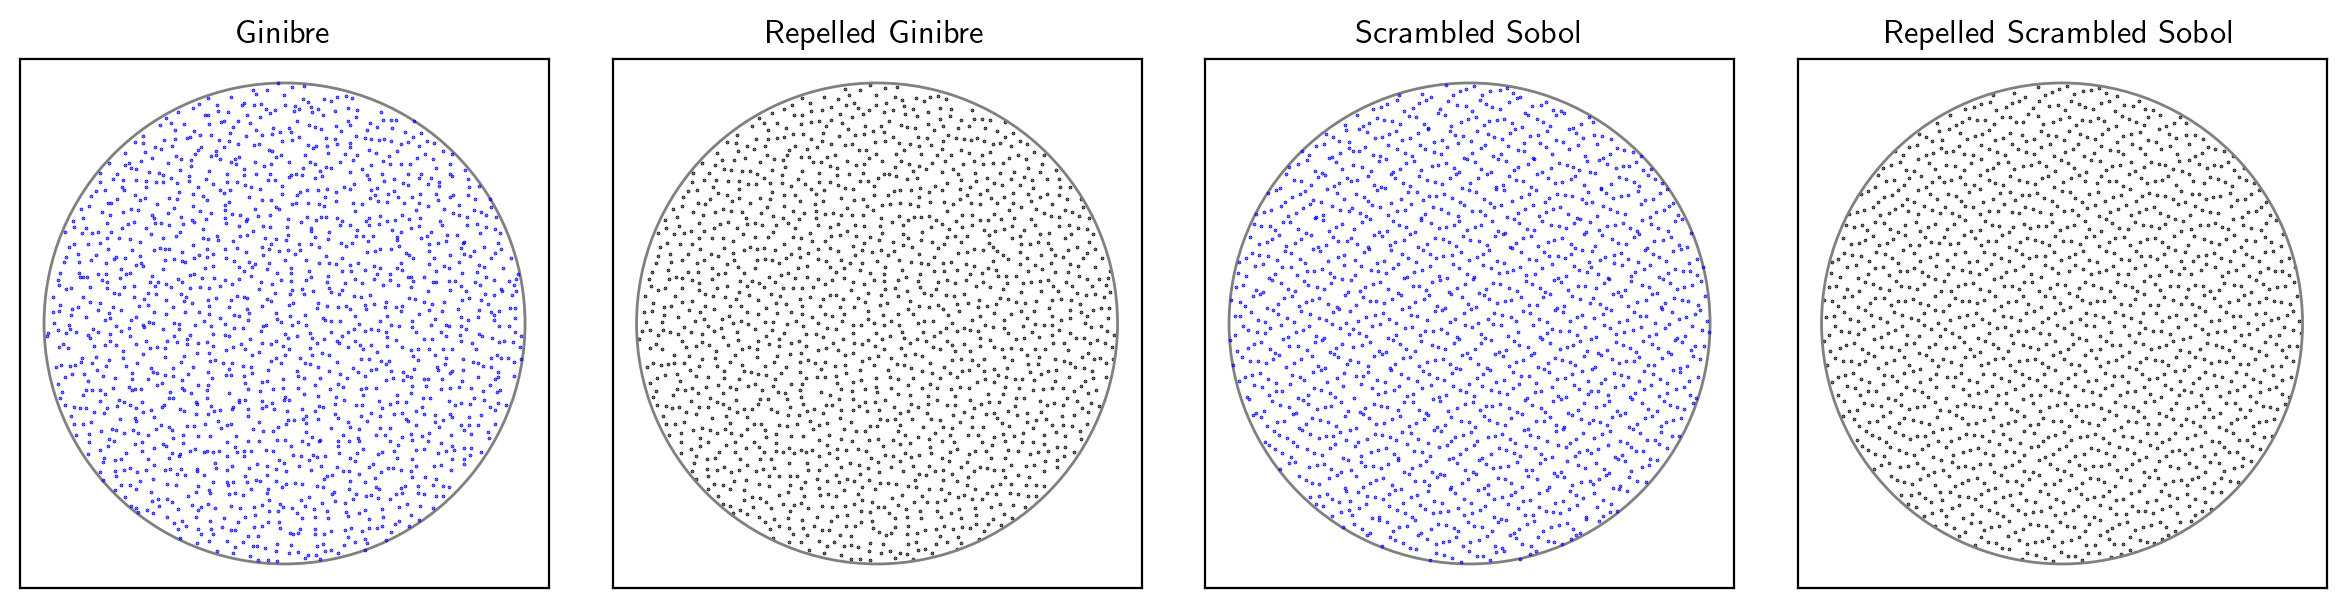

In [218]:
fig, ax= plt.subplots(1, 4, figsize=(12, 3))
#Ginibre
observation_window.plot(axis=ax[0], color="grey")
ginibre_pp.plot(axis=ax[0], s=0.1, c="b")
ax[0].set_title("Ginibre")
ax[0].set_xticks([])
ax[0].set_yticks([])
repelled_ginibre_pp.plot(axis=ax[1], s=0.1)
observation_window.plot(axis=ax[1], color="grey")
ax[1].set_title("Repelled Ginibre")
ax[1].set_xticks([])
ax[1].set_yticks([])
observation_window.plot(axis=ax[2], color="grey")
sobol_pp.plot(axis=ax[2], s=0.1, c="b")
ax[2].set_title("Scrambled Sobol")
ax[2].set_xticks([])
ax[2].set_yticks([])
repelled_sobol_pp.plot(axis=ax[3], s=0.1)
observation_window.plot(axis=ax[3], color="grey")
ax[3].set_title("Repelled Scrambled Sobol")
ax[3].set_xticks([])
ax[3].set_yticks([])
plt.tight_layout()
plt.savefig("other_repelled_model.pdf")
plt.show()

#### Variance reduction

In [219]:
import pickle
with open('data/list_samples_ginibre_pp.pkl', 'rb') as file:
    ginibre_pp_list = pickle.load(file)


### Ginibre

In [220]:
d=2
support_window = support_integrands(d) 
simulation_window = BallWindow(center=[0]*d, radius=np.sqrt(d)/2)
#Big window used to restrit the Ginibre sample to it, to get intensity = 500
intensity=500
big_ball_window = BallWindow(center=[0]*d, radius=math.sqrt(intensity*simulation_window.volume))

fct_list = [f_1, f_2, f_3]
fct_names = ["f_1", "f_2", "f_3"]
epsilon_0 = epsilon_critical(d, intensity)


#Ginibre
ginibre_pps = [from_structure_factor_object_to_rppy(g).restrict_to_window(big_ball_window) for g in ginibre_pp_list["ginibre_pp_ball"]]
ginibre_rescaled_pp = [rescaled_point_pattern(g, simulation_window) for g in ginibre_pps]

#Variance for ginibre
ginibre_pp_res = [g.restrict_to_window(support_window) for g in ginibre_rescaled_pp]
print(intensity, ginibre_pp_res[0].intensity)
mc_ginibre = _mc_result(ginibre_pp_res, "MC", 
                                 fct_list=fct_list, 
                                 fct_names=fct_names)

# variance for push
## f_1
std_f1_ginibre = mc_ginibre["mc_results_f_1"]["std_MC"]
## f_2
std_f2_ginibre = mc_ginibre["mc_results_f_2"]["std_MC"]
## f_3
std_f3_ginibre = mc_ginibre["mc_results_f_3"]["std_MC"]

nb_sample = len(ginibre_pps)

epsilons = np.linspace(-3/2*epsilon_0, 3*epsilon_0, 40).tolist()
epsilons.append(epsilon_0)
epsilons.append(0)
epsilons.sort()
print(len(epsilons))
print("d=", d, "intensity=", intensity, ",Nb samples=", nb_sample, ",Epsilon critical=", epsilon_0)


500 502.9296201703891
For MC
---------------
FOR f_1
std= [0.00021109710736224137]
FOR f_2
std= [0.00738750214458398]
FOR f_3
std= [0.0002793415365242228]
42
d= 2 intensity= 500 ,Nb samples= 50 ,Epsilon critical= 0.00015915494309189535


In [221]:
stds_f1_push_ginibre, stds_f3_push_ginibre, stds_f2_push_ginibre= [], [], []
mean_nb_point_ginibre = []
nb_cores=3
plot_fig=False
#push
i=0
for epsilon in epsilons:
    print("---------------")
    print(i +1, "/ ", len(epsilons))
    time_start = time.time() 
    print("epsilon", epsilon)
    if __name__ == "__main__":
        rpp_pp_ginibre = [RepelledPointProcess(p) for p in ginibre_rescaled_pp]
        #using F
        push_pp_ginibre_big = [g.repelled_point_pattern(epsilon=epsilon, nb_cores=nb_cores) for g in rpp_pp_ginibre]
    push_ginibre_pp = [g.restrict_to_window(support_window) for g in push_pp_ginibre_big]
    mean_nb_ginibre_res = np.mean([s.points.shape[0] for s in ginibre_pp_res])
    mean_nb_push_res = np.mean([s.points.shape[0] for s in push_ginibre_pp])
    mean_nb_point_ginibre.append(mean_nb_push_res)
    print("Mean N ginibre=", mean_nb_ginibre_res,  "Mean N push=", mean_nb_push_res)
    if plot_fig:
        fig, axis = plt.subplots(1, 3, figsize=(6,2))
        ginibre_rescaled_pp[0].plot(axis=axis[0])
        simulation_window.plot(axis=axis[0], color="b")
        support_window.plot(axis=axis[0], color="r")
        axis[0].set_title("ginibre restricted")
        push_pp_ginibre_big[0].plot(axis=axis[1])
        support_window.plot(axis=axis[1], color="r")
        simulation_window.plot(axis=axis[1], color="b")
        axis[1].set_title("Big pushed ginibre")
        push_ginibre_pp[0].plot(axis=axis[2])
        support_window.plot(axis=axis[2], color="r")
        axis[2].set_title("Pushed ginibre restricted")
        plt.show()
    mc_push_ginibre = _mc_result(push_ginibre_pp, "MCRB", 
                                 fct_list=fct_list, 
                                 fct_names=fct_names)
    
    # variance for push
    ## f_1
    stds_f1_push_ginibre.append(mc_push_ginibre["mc_results_f_1"]["std_MCRB"])
    ## f_2
    stds_f2_push_ginibre.append(mc_push_ginibre["mc_results_f_2"]["std_MCRB"])
    ## f_3
    stds_f3_push_ginibre.append(mc_push_ginibre["mc_results_f_3"]["std_MCRB"])
    i+=1
        


---------------
1 /  42
epsilon -0.000238732414637843
Mean N ginibre= 498.68 Mean N push= 499.16
For MCRB
---------------
FOR f_1
std= [0.00032081349653119185]
FOR f_2
std= [0.009648883990794218]
FOR f_3
std= [0.0004817955082065982]
---------------
2 /  42
epsilon -0.00022036838274262433
Mean N ginibre= 498.68 Mean N push= 499.16
For MCRB
---------------
FOR f_1
std= [0.00030724285210798524]
FOR f_2
std= [0.009134638907027846]
FOR f_3
std= [0.0004663328380559423]
---------------
3 /  42
epsilon -0.00020200435084740564
Mean N ginibre= 498.68 Mean N push= 499.1
For MCRB
---------------
FOR f_1
std= [0.00029644701096771277]
FOR f_2
std= [0.008952991666900247]
FOR f_3
std= [0.00045090061332312575]
---------------
4 /  42
epsilon -0.00018364031895218692
Mean N ginibre= 498.68 Mean N push= 499.22
For MCRB
---------------
FOR f_1
std= [0.0002871263290891604]
FOR f_2
std= [0.008732281257861355]
FOR f_3
std= [0.0004351429124422488]
---------------
5 /  42
epsilon -0.00016527628705696824


KeyboardInterrupt: 

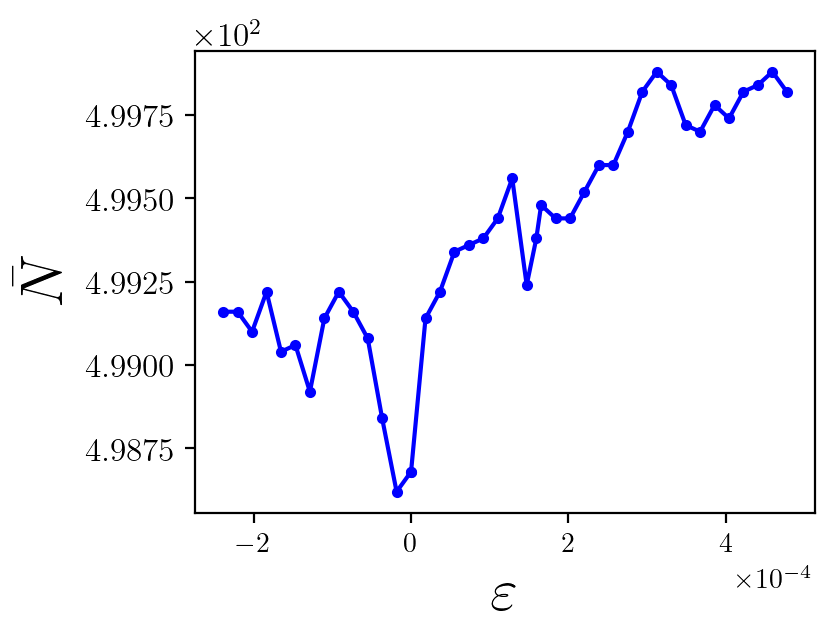

In [138]:
fig, axis = plt.subplots(figsize=(4,3))
plt.plot(epsilons, mean_nb_point_ginibre, 'b.')
plt.plot(epsilons, mean_nb_point_ginibre, 'b')

plt.xlabel(r"$\varepsilon$")
plt.ylabel(r"$\bar{N}$")
plt.show()

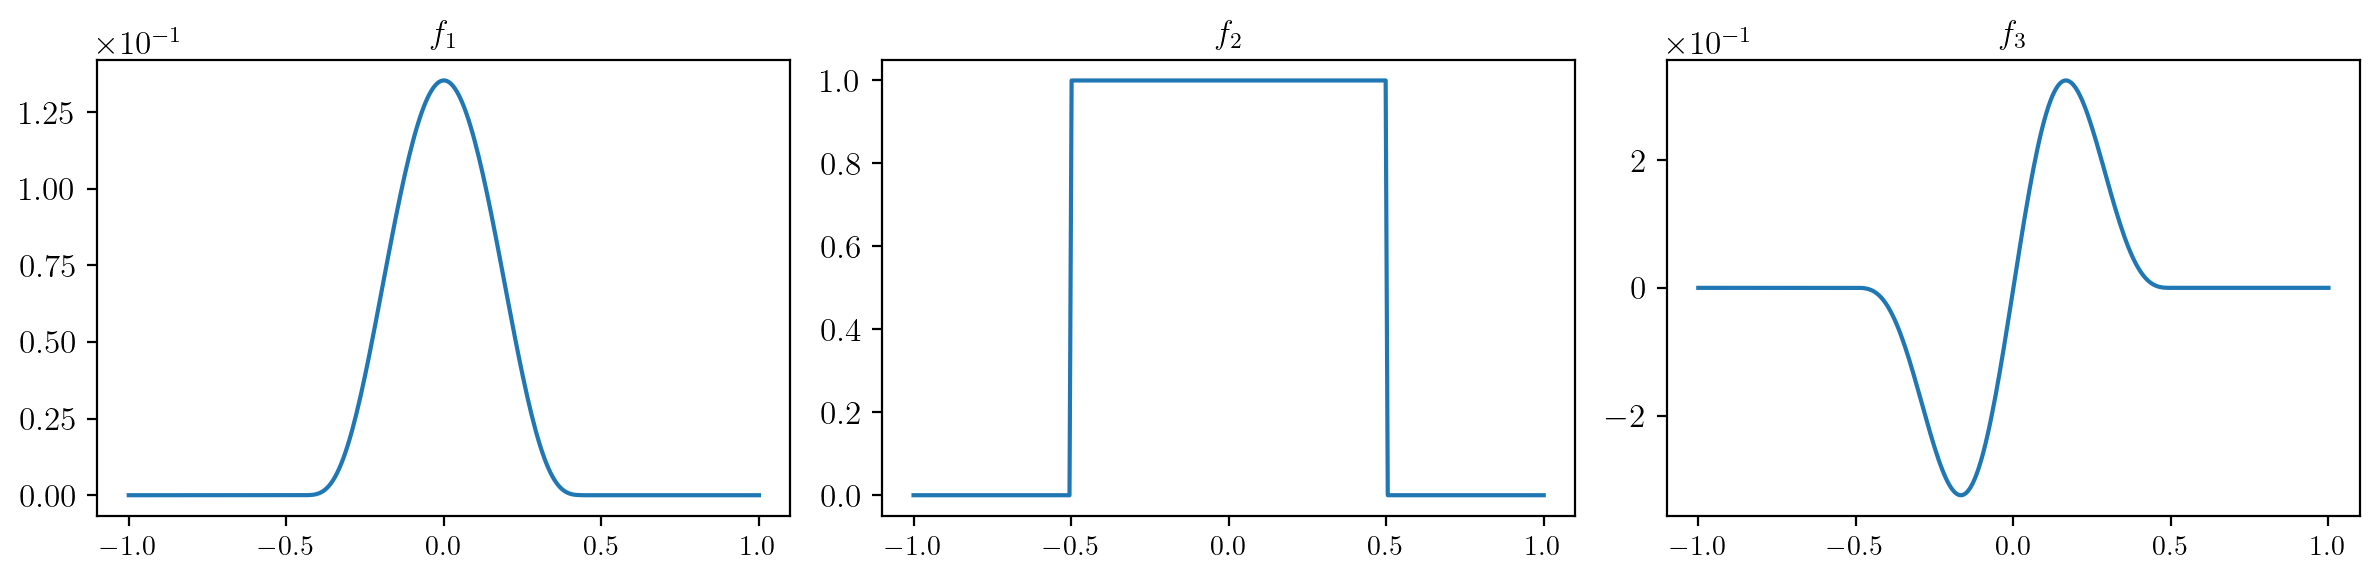

In [139]:
r=1 #radius observation window
x = np.atleast_2d(np.linspace(-r,r, 300)).T
z_f_1 = f_1(x)
z_f_2 = f_2(x)
z_f_3 = f_3(x)

fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 3, 1)
ax.plot(x, z_f_1 )
ax.set_title(r"$f_1$")
ax = fig.add_subplot(1, 3, 2)
ax.plot(x, z_f_2)
ax.set_title(r"$f_2$")
ax = fig.add_subplot(1, 3, 3)
ax.plot(x,  z_f_3)
ax.set_title(r"$f_3$")
plt.tight_layout()
plt.savefig("linear_stat_used_for_var_comp_2d.pdf")
plt.show()

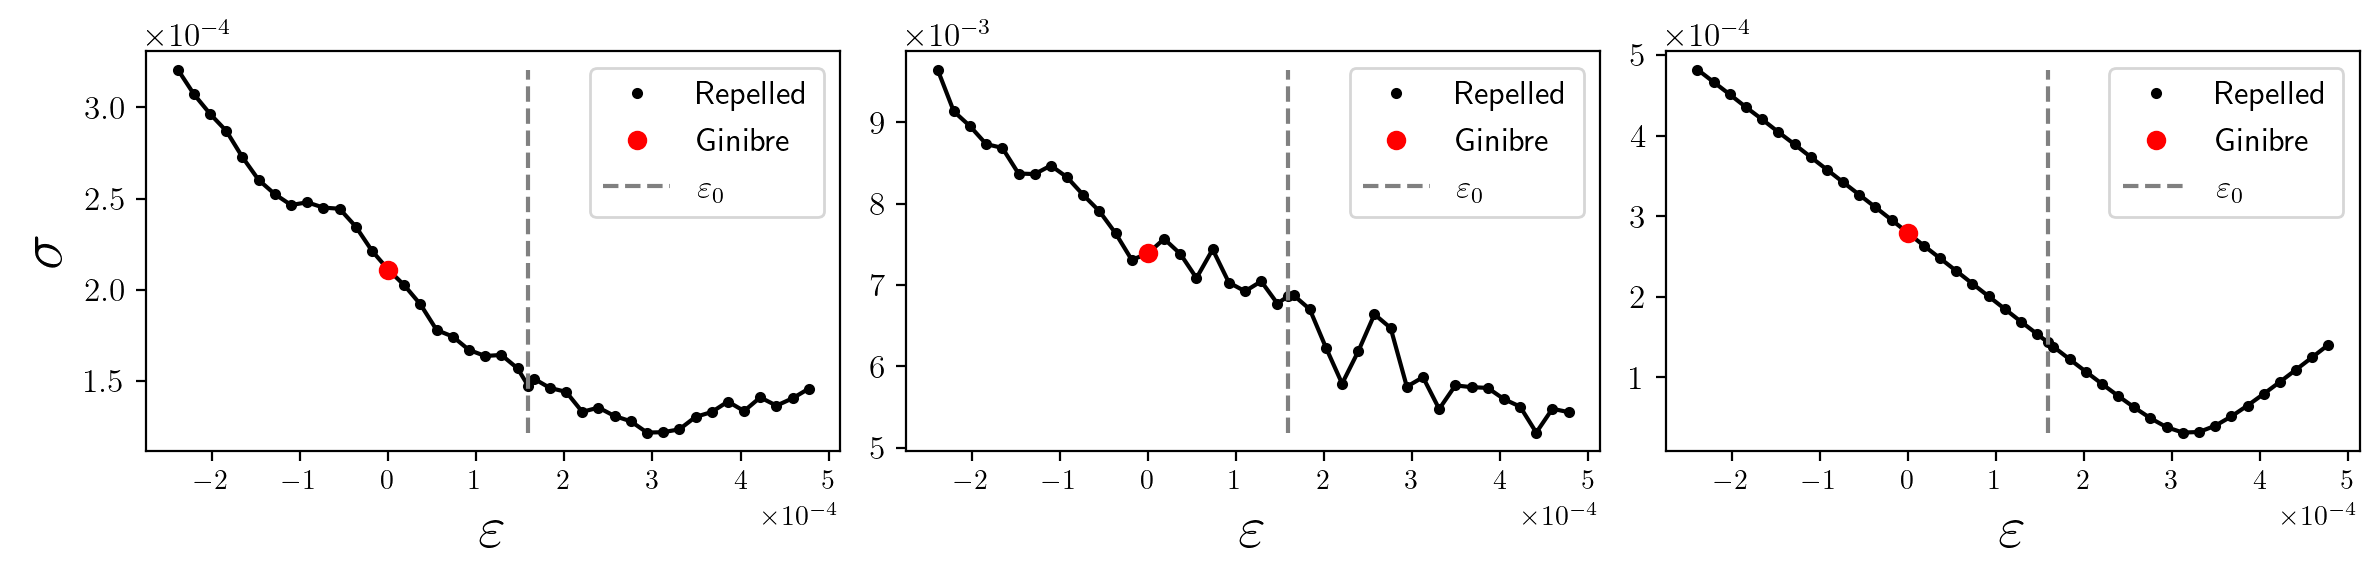

In [147]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
#f_1
ax[0].plot(epsilons, stds_f1_push_ginibre, "k.", label=r"Repelled" )
ax[0].plot(epsilons, stds_f1_push_ginibre, "k" )
ax[0].plot(0, std_f1_ginibre, "ro", label="Ginibre")
ax[0].vlines(epsilon_0, ymin=min(stds_f1_push_ginibre), ymax=max(stds_f1_push_ginibre), 
             colors="grey", linestyles='dashed', label=r"$\varepsilon_0$")
ax[0].legend()
ax[0].set_xlabel(r"$\varepsilon$")
ax[0].set_ylabel(r"$\sigma$")
#f_2
ax[1].plot(epsilons, stds_f2_push_ginibre,  "k.", label=r"Repelled")
ax[1].plot(epsilons, stds_f2_push_ginibre,  "k")
ax[1].plot(0, std_f2_ginibre, "ro", label="Ginibre")
ax[1].vlines(epsilon_0, ymin=min(stds_f2_push_ginibre), ymax=max(stds_f2_push_ginibre), 
             colors="grey", linestyles='dashed', label=r"$\varepsilon_0$")
ax[1].legend()
#ax[1].set_title(r"$f_2$")
ax[1].set_xlabel(r"$\varepsilon$")
#ax[1].set_ylabel(r"$\sigma(\sum_{i=1}^{N} f(x_i)/N)$")
#f_3
ax[2].plot(epsilons, stds_f3_push_ginibre,  "k.", label=r"Repelled")
ax[2].plot(epsilons, stds_f3_push_ginibre,  "k")
ax[2].plot(0, std_f3_ginibre, "ro", label="Ginibre")
ax[2].vlines(epsilon_0, ymin=min(stds_f3_push_ginibre), ymax=max(stds_f3_push_ginibre), 
             colors="grey", linestyles='dashed', label=r"$\varepsilon_0$")

ax[2].legend()
ax[2].set_xlabel(r"$\varepsilon$")
plt.tight_layout()
plt.savefig("variance_linear_stat_2d_ginibre.pdf")
plt.show()

### Scramble Sobol

In [229]:

d=2
support_window = support_integrands(d) 
simulation_window = BallWindow(center=[0]*d, radius=np.sqrt(d)/2)
#Big window used to restrit the sobol sample to it, to get intensity = 500
intensity=500
nb_points = intensity*simulation_window.volume
nb_sample = len(ginibre_pps)

fct_list = [f_1, f_2, f_3]
fct_names = ["f_1", "f_2", "f_3"]
epsilon_0 = epsilon_critical(d, intensity)


#Sobol
np.random.seed(12)
fixed_seed = np.random.poisson(lam=10, size=nb_sample).tolist()
sobol = ScrambleSobolPointProcess()
sobol_pps = [sobol.generate_point_pattern(nb_points=nb_points, window=simulation_window, seed=s) for s in fixed_seed]

#Variance for sobol
sobol_pp_res = [g.restrict_to_window(support_window) for g in sobol_pps]
print(intensity, sobol_pp_res[0].intensity)
mc_sobol = _mc_result(sobol_pp_res, "MC", 
                      fct_list=fct_list, 
                      fct_names=fct_names)

# variance for push
## f_1
std_f1_sobol = mc_sobol["mc_results_f_1"]["std_MC"]
## f_2
std_f2_sobol = mc_sobol["mc_results_f_2"]["std_MC"]
## f_3
std_f3_sobol = mc_sobol["mc_results_f_3"]["std_MC"]

epsilons = np.linspace(-3/2*epsilon_0, 3*epsilon_0, 40).tolist()
epsilons.append(epsilon_0)
epsilons.append(0)
epsilons.sort()
print(len(epsilons))
print("d=", d, "intensity=", intensity, ",Nb samples=", nb_sample, ",Epsilon critical=", epsilon_0)


500 499.9999999999999
For MC
---------------
FOR f_1
std= [0.00014882380854225384]
FOR f_2
std= [0.006009135886174219]
FOR f_3
std= [0.0002170867878725216]
42
d= 2 intensity= 500 ,Nb samples= 50 ,Epsilon critical= 0.00015915494309189535


In [230]:
stds_f1_repelled_sobol, stds_f3_repelled_sobol, stds_f2_repelled_sobol= [], [], []
mean_nb_point_sobol = []
nb_cores=3
plot_fig=False
#push
i=0
for epsilon in epsilons:
    print("---------------")
    print(i +1, "/ ", len(epsilons))
    time_start = time.time() 
    print("epsilon", epsilon)
    if __name__ == "__main__":
        rpp_pp_sobol = [RepelledPointProcess(p) for p in sobol_pps]
        #using F
        repelled_pp_sobol_big = [g.repelled_point_pattern(epsilon=epsilon, nb_cores=nb_cores) for g in rpp_pp_sobol]
    repelled_sobol_pp = [g.restrict_to_window(support_window) for g in repelled_pp_sobol_big]
    mean_nb_sobol_res = np.mean([s.points.shape[0] for s in sobol_pps])
    mean_nb_repelled_res = np.mean([s.points.shape[0] for s in repelled_sobol_pp])
    mean_nb_point_sobol.append(mean_nb_repelled_res)
    print("Mean N sobol=", mean_nb_sobol_res,  "Mean N repelled=", mean_nb_repelled_res)
    if plot_fig:
        fig, axis = plt.subplots(1, 3, figsize=(6,2))
        sobol_pps[0].plot(axis=axis[0])
        simulation_window.plot(axis=axis[0], color="b")
        support_window.plot(axis=axis[0], color="r")
        axis[0].set_title("sobol restricted")
        repelled_pp_sobol_big[0].plot(axis=axis[1])
        support_window.plot(axis=axis[1], color="r")
        simulation_window.plot(axis=axis[1], color="b")
        axis[1].set_title("Big repelled sobol")
        repelled_sobol_pp[0].plot(axis=axis[2])
        support_window.plot(axis=axis[2], color="r")
        axis[2].set_title("Repelled sobol restricted")
        plt.show()
    mc_repelled_sobol = _mc_result(repelled_sobol_pp, "MCRB", 
                                 fct_list=fct_list, 
                                 fct_names=fct_names)
    
    # variance for push
    ## f_1
    stds_f1_repelled_sobol.append(mc_repelled_sobol["mc_results_f_1"]["std_MCRB"])
    ## f_2
    stds_f2_repelled_sobol.append(mc_repelled_sobol["mc_results_f_2"]["std_MCRB"])
    ## f_3
    stds_f3_repelled_sobol.append(mc_repelled_sobol["mc_results_f_3"]["std_MCRB"])
    i+=1
        


---------------
1 /  42
epsilon -0.000238732414637843
Mean N sobol= 785.74 Mean N repelled= 500.18
For MCRB
---------------
FOR f_1
std= [0.00026225857466223834]
FOR f_2
std= [0.0064972514979385505]
FOR f_3
std= [0.0003936784733806199]
---------------
2 /  42
epsilon -0.00022036838274262433
Mean N sobol= 785.74 Mean N repelled= 499.82
For MCRB
---------------
FOR f_1
std= [0.0002422402815842361]
FOR f_2
std= [0.006118306248535218]
FOR f_3
std= [0.00038029100711022614]
---------------
3 /  42
epsilon -0.00020200435084740564
Mean N sobol= 785.74 Mean N repelled= 499.9
For MCRB
---------------
FOR f_1
std= [0.00022996448019317828]
FOR f_2
std= [0.006319866853340389]
FOR f_3
std= [0.0003667317137068255]
---------------
4 /  42
epsilon -0.00018364031895218692
Mean N sobol= 785.74 Mean N repelled= 499.98
For MCRB
---------------
FOR f_1
std= [0.0002158397243791772]
FOR f_2
std= [0.0055854852778768355]
FOR f_3
std= [0.0003529208048751103]
---------------
5 /  42
epsilon -0.0001652762870569682

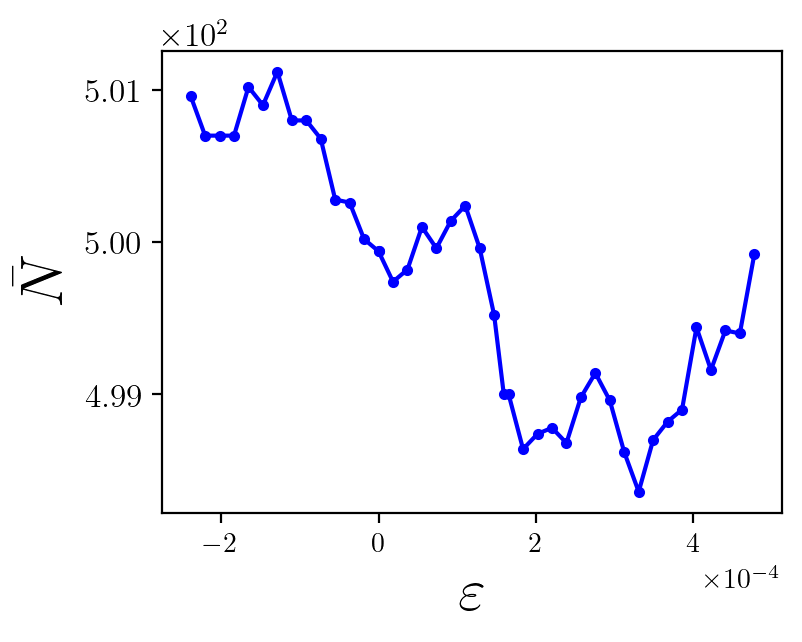

In [227]:
fig, axis = plt.subplots(figsize=(4,3))
plt.plot(epsilons, mean_nb_point_sobol, 'b.')
plt.plot(epsilons, mean_nb_point_sobol, 'b')

plt.xlabel(r"$\varepsilon$")
plt.ylabel(r"$\bar{N}$")
plt.show()

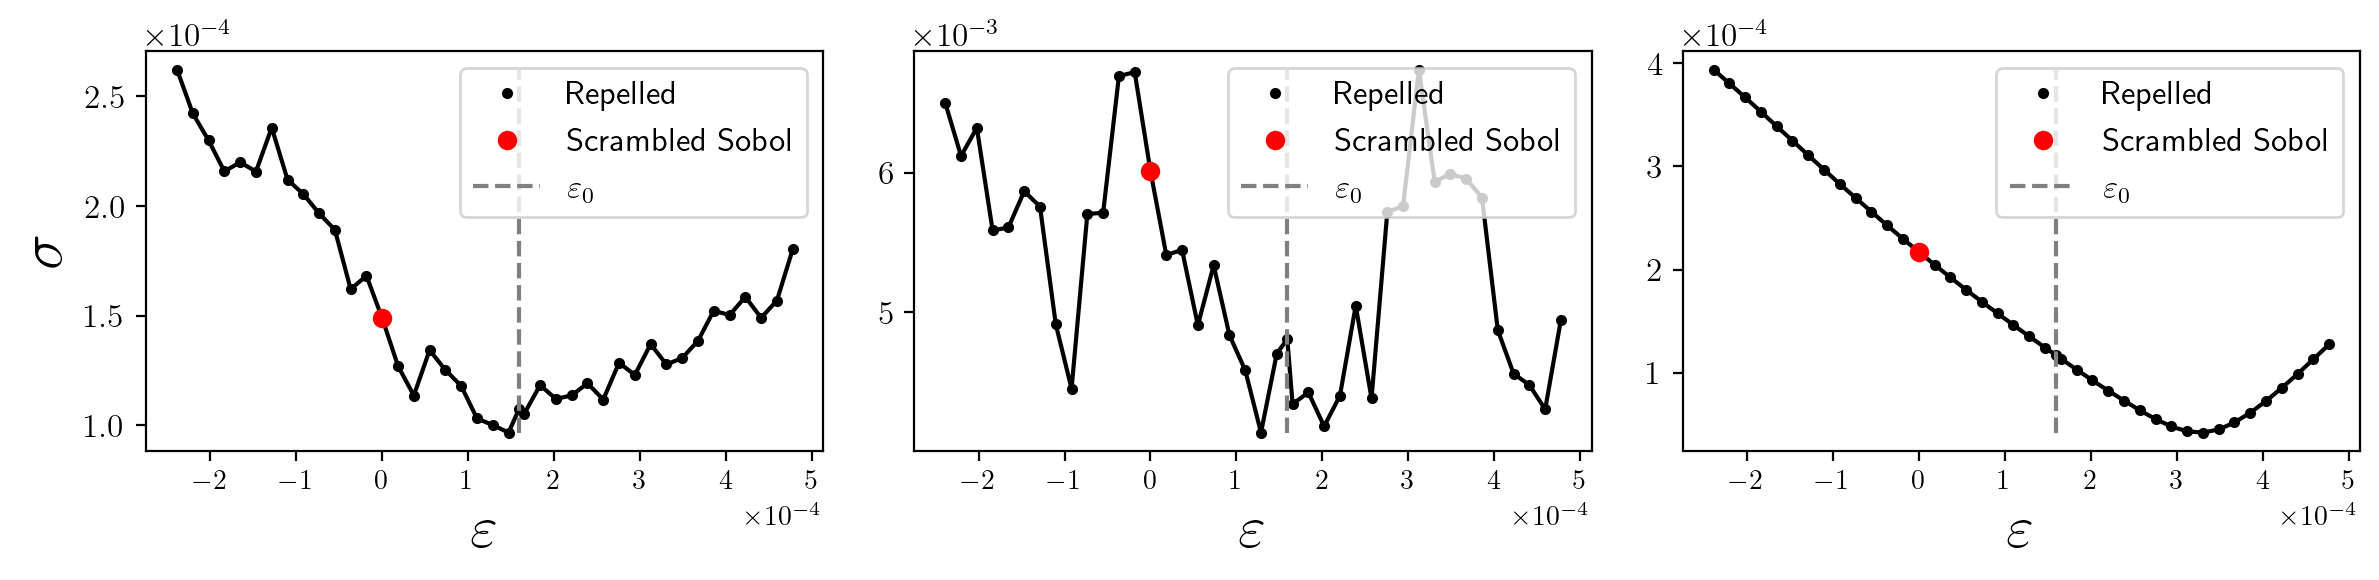

In [231]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
#f_1
ax[0].plot(epsilons, stds_f1_repelled_sobol, "k.", label=r"Repelled" )
ax[0].plot(epsilons, stds_f1_repelled_sobol, "k" )
ax[0].plot(0, std_f1_sobol, "ro", label="Scrambled Sobol")
ax[0].vlines(epsilon_0, ymin=min(stds_f1_repelled_sobol), ymax=max(stds_f1_repelled_sobol), 
             colors="grey", linestyles='dashed', label=r"$\varepsilon_0$")
ax[0].legend()
ax[0].set_xlabel(r"$\varepsilon$")
ax[0].set_ylabel(r"$\sigma$")
#f_2
ax[1].plot(epsilons, stds_f2_repelled_sobol,  "k.", label=r"Repelled")
ax[1].plot(epsilons, stds_f2_repelled_sobol,  "k")
ax[1].plot(0, std_f2_sobol, "ro", label="Scrambled Sobol")
ax[1].vlines(epsilon_0, ymin=min(stds_f2_repelled_sobol), ymax=max(stds_f2_repelled_sobol), 
             colors="grey", linestyles='dashed', label=r"$\varepsilon_0$")
ax[1].legend()
#ax[1].set_title(r"$f_2$")
ax[1].set_xlabel(r"$\varepsilon$")
#ax[1].set_ylabel(r"$\sigma(\sum_{i=1}^{N} f(x_i)/N)$")
#f_3
ax[2].plot(epsilons, stds_f3_repelled_sobol,  "k.", label=r"Repelled")
ax[2].plot(epsilons, stds_f3_repelled_sobol,  "k")
ax[2].plot(0, std_f3_sobol, "ro", label="Scrambled Sobol")
ax[2].vlines(epsilon_0, ymin=min(stds_f3_repelled_sobol), ymax=max(stds_f3_repelled_sobol), 
             colors="grey", linestyles='dashed', label=r"$\varepsilon_0$")

ax[2].legend()
ax[2].set_xlabel(r"$\varepsilon$")
plt.tight_layout()
plt.savefig("variance_linear_stat_2d_sobol.pdf")
plt.show()

## 4.3 Pair correlation function anf structure factor

In [232]:
from mcrppy.spatial_windows import BoxWindow, BallWindow
from mcrppy.point_pattern import PointPattern
from structure_factor.spatial_windows import BallWindow as BallWindow_sf
from structure_factor.spatial_windows import BoxWindow as BoxWindow_sf
from structure_factor.point_pattern import PointPattern as PointPattern_sf

def transform_to_structure_factor_object(point_pattern):
    if isinstance(point_pattern.window, BallWindow):
        window = BallWindow_sf(center=point_pattern.window.center,
                    radius=point_pattern.window.radius)
    else:
        print( type(point_pattern.window))
        window = BoxWindow_sf(bounds=point_pattern.window.bounds)
    sf_object= PointPattern_sf(
        points=point_pattern.points, 
        window=window,
        intensity=point_pattern.intensity)
    return sf_object

### d=2

In [234]:

## Poisson
intensity = 1/math.pi
poisson = HomogeneousPoissonPointProcess(intensity)

d=2
r=150
window = BallWindow(center=[0]*d, radius=r)
_, repelled_pp = poisson.generate_repelled_point_pattern(window, seed=1, nb_cores=4)
print("Nb points =", repelled_pp.points.shape[0])

## Repelled
repelled_pp_sf_ball = transform_to_structure_factor_object(repelled_pp)
l = 2*r/math.sqrt(d)
window_2 = BoxWindow_sf(bounds=[[-l/2,l/2]]*d)
repelled_pp_sf_box = repelled_pp_sf_ball.restrict_to_window(window_2)
# fig, ax = plt.subplots(1,2, figsize=(6,3))
# repelled_pp_sf_ball.plot(axis=ax[0])
# repelled_pp_sf_box.plot(axis=ax[1])
# plt.show()

Nb points = 22443


##### Structure factor

In [235]:

from structure_factor.structure_factor import StructureFactor
sf_isotropic = StructureFactor(repelled_pp_sf_ball)
sf = StructureFactor(repelled_pp_sf_box)

In [236]:
# scattering intensity
k, si = sf.scattering_intensity(k_max=8, meshgrid_shape=(150,150))

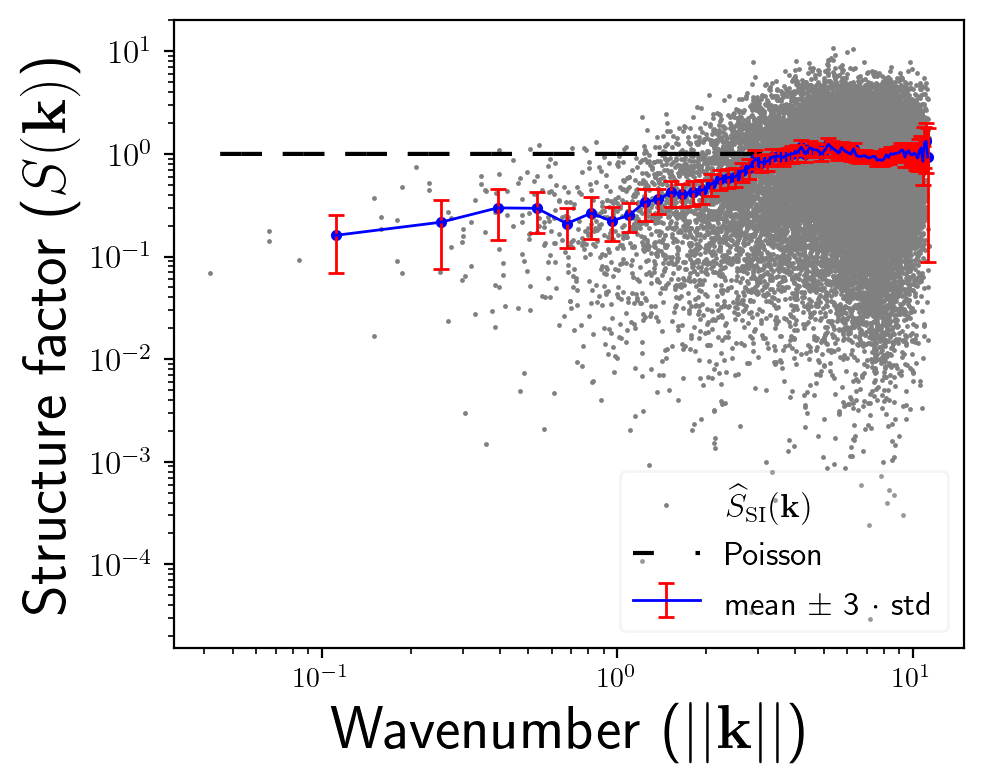

In [239]:
fig, ax = plt.subplots(figsize=(5,4))
sf.plot_non_isotropic_estimator(
    k,
    si,
    axes=ax,
    plot_type="radial",
    error_bar=True,
    bins=80,
    scale="log",
    label=r"$\widehat{S}_{\mathrm{SI}}(\mathbf{k})$",
    file_name="sf_si_repelled_poisson.pdf"
)

plt.tight_layout(pad=1)

In [258]:
# Bartlett's isotropic estimator on allowed wavenumbers
# Running time = 34 min
import time

start_time = time.time()
k_norm, s_bi = sf_isotropic.bartlett_isotropic_estimator(nb_values=300)
print("--- %s seconds ---" % (time.time() - start_time))


--- 2530.7470610141754 seconds ---


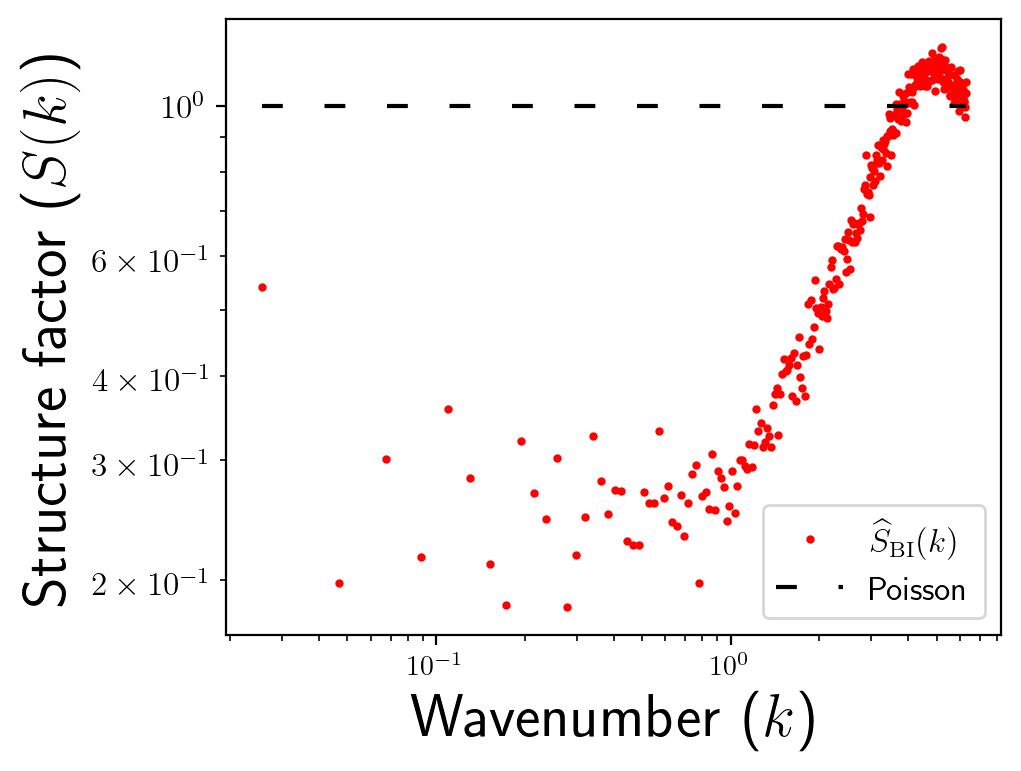

<Axes: xlabel='Wavenumber ($k$)', ylabel='Structure factor ($S(k)$)'>

In [289]:

#Plot
fig, axis = plt.subplots(figsize=(5,4))
sf_isotropic.plot_isotropic_estimator(k_norm, s_bi, 
                                      axis=axis,
                                    label=r"$\widehat{S}_{\mathrm{BI}}(k)$",
                                    color="r",
                                    file_name="sf_bi_repelled_poisson.pdf")

#### Pair correlatoin function

In [328]:
# pcf.fv
import structure_factor.pair_correlation_function as pcf

r_max=3
pcf_fv_2d = pcf.estimate(repelled_pp_sf_ball, 
                         method="fv", 
                         Kest=dict(rmax=r_max), 
                         fv=dict(method="b", spar=0.2)
                             )



R[write to console]: number of data points exceeds 3000 - computing border correction estimate only



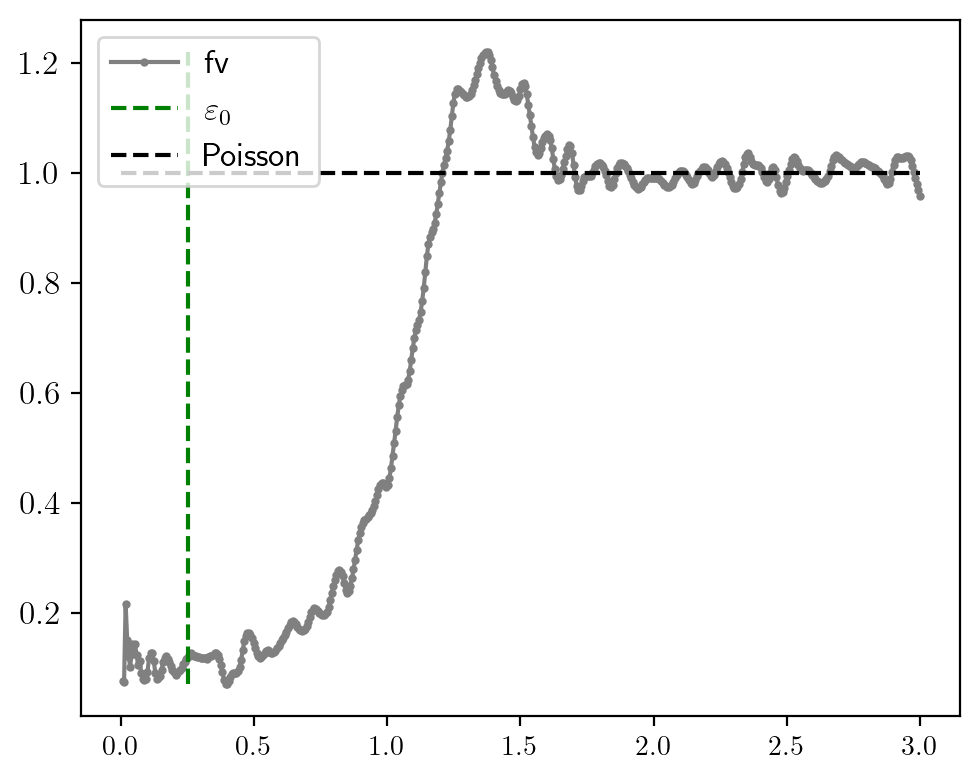

In [329]:
epsilon = epsilon_critical(d, intensity)
# Plot
pcf_fv_values = pcf_fv_2d["pcf"]
r_values = pcf_fv_2d["r"]
fig, axis = plt.subplots(figsize=(5,4))
axis.plot(r_values, pcf_fv_values, c="grey", marker=".", label="fv", markersize=4)
axis.vlines(epsilon, ymin=np.nanmin(pcf_fv_values), ymax=np.nanmax(pcf_fv_values), 
             colors="g", linestyles='dashed', label=r"$\varepsilon_0$")
axis.hlines(1,xmax=max(r_values), xmin=min(r_values), colors="k", linestyles='dashed', label="Poisson")
axis.legend()
plt.tight_layout()
plt.show()

In [331]:
# pcf.ppp
import structure_factor.pair_correlation_function as pcf

r= np.linspace(0, r_max, 100)
pcf_ppp_2d = pcf.estimate(repelled_pp_sf_ball, 
                         method="ppp", 
                         r=r)



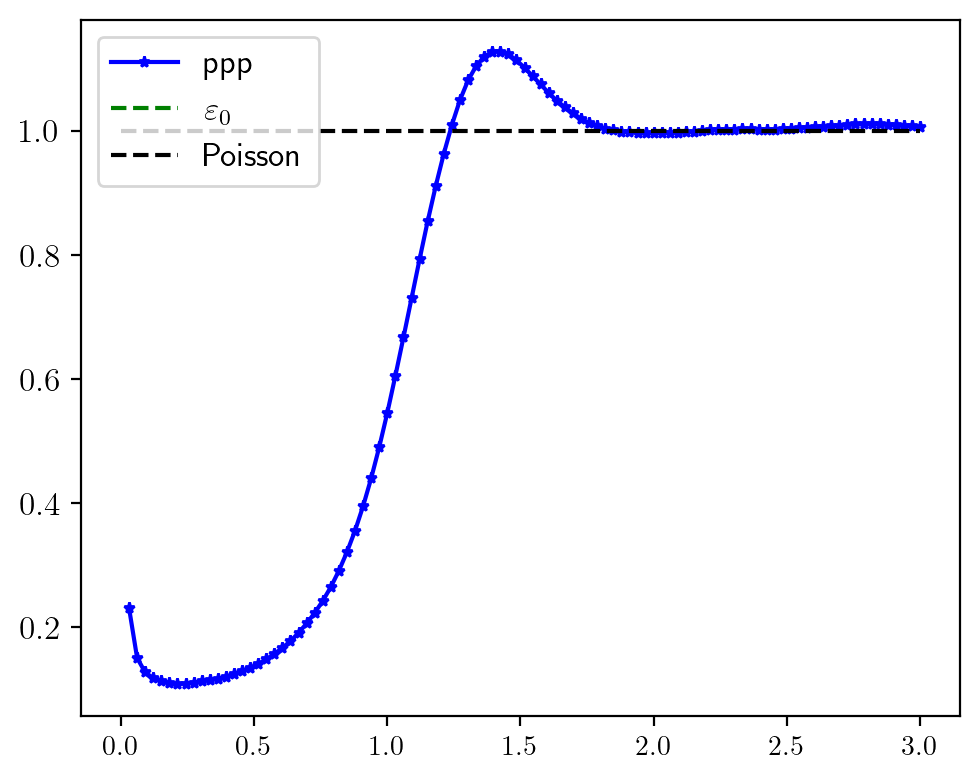

In [332]:
epsilon = epsilon_critical(d, intensity)
# Plot
pcf_ppp_trans = pcf_ppp_2d["trans"]
pcf_ppp_iso = pcf_ppp_2d["iso"]
r_values_2 = pcf_ppp_2d["r"]
fig, axis = plt.subplots(figsize=(5,4))

axis.plot(r_values_2, pcf_ppp_trans, c="b", marker="*", label="ppp", markersize=4)
axis.vlines(epsilon, ymin=np.nanmin(pcf_ppp_trans), 
            ymax=np.nanmax(pcf_ppp_trans), 
             colors="g", linestyles='dashed', label=r"$\varepsilon_0$")
axis.hlines(1,xmax=max(r_values_2), xmin=min(r_values_2), colors="k", linestyles='dashed', label="Poisson")
axis.legend()
plt.tight_layout()
plt.show()

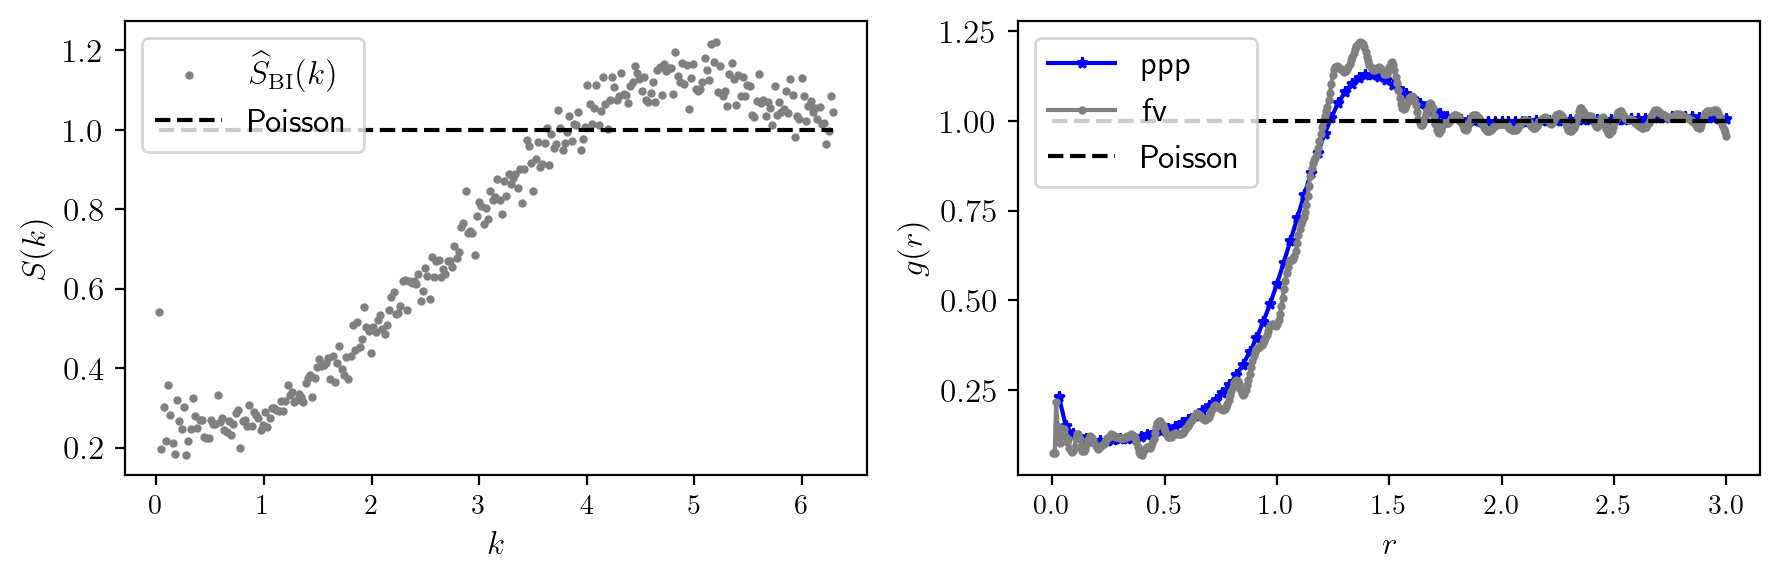

In [333]:
plt.rc('axes', labelsize=12)

epsilon = epsilon_critical(d, intensity)
fig, ax = plt.subplots(1, 2, figsize=(9,3))

# sf.plot_non_isotropic_estimator(k, si, axes=ax[0],
#     plot_type="radial", error_bar=True, bins=80, scale="log",
#     label=r"$\widehat{S}_{\mathrm{SI}}(\mathbf{k})$"
# )
# ax[0].set_xlabel(r"$\|\mathbf{k}\|_2$")
# ax[0].set_ylabel(r"$S(\mathbf{k})$")

ax[0].scatter(k_norm, s_bi, color="grey", s=4, label=r"$\widehat{S}_{\mathrm{BI}}(k)$")
ax[0].hlines(1, xmax=max(k_norm), xmin=min(k_norm), colors="k", linestyles='dashed', label="Poisson")
ax[0].legend()
ax[0].set_xlabel(r"$k$")
ax[0].set_ylabel(r"$S(k)$")

ax[1].plot(r_values_2, pcf_ppp_trans, c="b", marker="*", label="ppp", markersize=4)
ax[1].plot(r_values, pcf_fv_values, c="grey", marker=".", label="fv", markersize=4)
ax[1].hlines(1, xmax=max(r_values), xmin=min(r_values), colors="k", linestyles='dashed', label="Poisson")
ax[1].set_xlabel(r"$r$")
ax[1].set_ylabel(r"$g(r)$")
ax[1].legend()
plt.tight_layout()
plt.savefig("pcf_and_sf_2D.pdf")
plt.show()


### d=3

In [334]:

## Poisson
intensity = 1/math.pi
poisson = HomogeneousPoissonPointProcess(intensity)

d=3
r=150
window = BallWindow(center=[0]*d, radius=r)
if __name__ == "__main__":
    _, repelled_pp = poisson.generate_repelled_point_pattern(window, seed=1, nb_cores=4)
print("Nb points =", repelled_pp.points.shape[0])

## Repelled
repelled_pp_sf_ball = transform_to_structure_factor_object(repelled_pp)
l = 2*r/math.sqrt(d)
window_2 = BoxWindow_sf(bounds=[[-l/2,l/2]]*d)
repelled_pp_sf_box = repelled_pp_sf_ball.restrict_to_window(window_2)
# fig, ax = plt.subplots(1,2, figsize=(6,3))
# repelled_pp_sf_ball.plot(axis=ax[0])
# repelled_pp_sf_box.plot(axis=ax[1])
# plt.show()

KeyboardInterrupt: 